# Unit test notebook for Fission Fragment 1

In [1]:
from cheftgp.eft import *
from cheftgp.gaussianprocess import *
from cheftgp.graphs import *
from cheftgp.scattering import *
from cheftgp.utils import *

import scipy
from scipy.stats import multivariate_normal
from scipy.optimize import curve_fit
from scipy.interpolate import interpn

## We make sure that `p_approx` generalizes from one to two dimensions for all prescriptions of $p$

functions tested: p_approx

In [2]:
# sparse meshes
deg_mesh = np.array([45, 90, 135])
tlab_mesh = np.array([3, 12, 48, 192])

# p = relative momentum
p_grid_prel = p_approx(p_name = "pprel", 
                 prel = E_to_p(E_lab = tlab_mesh, interaction = "np"), 
                 degrees = deg_mesh)
print(p_grid_prel)

# p = center-of-mass momentum (or momentum exchange)
p_grid_qcm = p_approx(p_name = "pqcm", 
                 prel = E_to_p(E_lab = tlab_mesh, interaction = "np"), 
                 degrees = deg_mesh)
print(p_grid_qcm)

# p = softmax(prel, qcm)
p_grid_pqsmax = p_approx(p_name = "psmax", 
                 prel = E_to_p(E_lab = tlab_mesh, interaction = "np"), 
                 degrees = deg_mesh)
print(p_grid_pqsmax)

# p = max(prel, qcm)
p_grid_pqmax = p_approx(p_name = "pmax", 
                 prel = E_to_p(E_lab = tlab_mesh, interaction = "np"), 
                 degrees = deg_mesh)
print(p_grid_pqmax)

[[ 37.51542954  75.03085916 150.06171898 300.12344279]
 [ 37.51542954  75.03085916 150.06171898 300.12344279]
 [ 37.51542954  75.03085916 150.06171898 300.12344279]]
[[ 28.71306668  57.42613343 114.85226737 229.70453844]
 [ 53.05482925 106.10965862 212.21931818 424.43864318]
 [ 69.31947501 138.63895017 277.27790156 554.55581205]]
[[ 47.52444418  82.02942825 153.27705819 300.71938793]
 [ 60.68300946 109.99172106 213.11156777 424.48001297]
 [ 73.07604023 139.47034611 277.31371633 554.55587598]]
[[ 37.51542954  75.03085916 150.06171898 300.12344279]
 [ 53.05482925 106.10965862 212.21931818 424.43864318]
 [ 69.31947501 138.63895017 277.27790156 554.55581205]]


## We make sure that `Q_approx` generalizes from one to two dimensions for all prescriptions of $Q$ and $p$

functions tested: Q_approx

In [3]:
Q_sum = Q_approx(p = p_grid_prel, 
                 Q_parametrization = "sum", 
                 Lambda_b = 600, 
                 m_pi = 138,
                 single_expansion=False)
print(Q_sum)

Q_smax = Q_approx(p = p_grid_prel, 
                 Q_parametrization = "smax", 
                 Lambda_b = 600, 
                 m_pi = 138,
                 single_expansion=False)
print(Q_smax)

Q_max = Q_approx(p = p_grid_prel, 
                 Q_parametrization = "max", 
                 Lambda_b = 600, 
                 m_pi = 138,
                 single_expansion=False)
print(Q_max)

Q_sum = Q_approx(p = p_grid_qcm, 
                 Q_parametrization = "sum", 
                 Lambda_b = 600, 
                 m_pi = 138,
                 single_expansion=False)
print(Q_sum)

Q_smax = Q_approx(p = p_grid_qcm, 
                 Q_parametrization = "smax", 
                 Lambda_b = 600, 
                 m_pi = 138,
                 single_expansion=False)
print(Q_smax)

Q_max = Q_approx(p = p_grid_qcm, 
                 Q_parametrization = "max", 
                 Lambda_b = 600, 
                 m_pi = 138,
                 single_expansion=False)
print(Q_max)

Q_sum = Q_approx(p = p_grid_pqsmax, 
                 Q_parametrization = "sum", 
                 Lambda_b = 600, 
                 m_pi = 138,
                 single_expansion=False)
print(Q_sum)

Q_smax = Q_approx(p = p_grid_pqsmax, 
                 Q_parametrization = "smax", 
                 Lambda_b = 600, 
                 m_pi = 138,
                 single_expansion=False)
print(Q_smax)

Q_max = Q_approx(p = p_grid_pqsmax, 
                 Q_parametrization = "max", 
                 Lambda_b = 600, 
                 m_pi = 138,
                 single_expansion=False)
print(Q_max)

Q_sum = Q_approx(p = p_grid_pqmax, 
                 Q_parametrization = "sum", 
                 Lambda_b = 600, 
                 m_pi = 138,
                 single_expansion=False)
print(Q_sum)

Q_smax = Q_approx(p = p_grid_pqmax, 
                 Q_parametrization = "smax", 
                 Lambda_b = 600, 
                 m_pi = 138,
                 single_expansion=False)
print(Q_smax)

Q_max = Q_approx(p = p_grid_pqmax, 
                 Q_parametrization = "max", 
                 Lambda_b = 600, 
                 m_pi = 138,
                 single_expansion=False)
print(Q_max)

[[0.23782579 0.2886597  0.39032753 0.5936632 ]
 [0.23782579 0.2886597  0.39032753 0.5936632 ]
 [0.23782579 0.2886597  0.39032753 0.5936632 ]]
[[0.22998163 0.2285464  0.24291757 0.4990366 ]
 [0.22998163 0.2285464  0.24291757 0.4990366 ]
 [0.22998163 0.2285464  0.24291757 0.4990366 ]]
[[0.23       0.23       0.25010286 0.50020574]
 [0.23       0.23       0.25010286 0.50020574]
 [0.23       0.23       0.25010286 0.50020574]]
[[0.22589846 0.26480506 0.34261825 0.49824463]
 [0.25888188 0.3307719  0.47455192 0.76211198]
 [0.2809207  0.37484953 0.56270718 0.93842251]]
[[0.22999693 0.22971045 0.22164143 0.37864226]
 [0.22982446 0.22271228 0.34790216 0.70721444]
 [0.22908373 0.23054107 0.46038721 0.92421866]]
[[0.23       0.23       0.23       0.3828409 ]
 [0.23       0.23       0.35369886 0.70739774]
 [0.23       0.23106492 0.46212984 0.92425969]]
[[0.25138814 0.29814286 0.39468436 0.59447072]
 [0.26921817 0.33603214 0.47576093 0.76216804]
 [0.28601089 0.37597608 0.56275571 0.9384226 ]]
[[0.22

# Generating random data, calculating posterior pdfs, and re-extracting physically meaningful input quantities ($\Lambda_{b}$, $m_{\rm eff}$, $Q$, and $\ell$)

functions tested: plot_posteriors_curvewise, plot_posteriors_pointwise

#### Define necessary functions

In [4]:
# custom version of Q_approx for these unit tests
def Q_approx_unit(p, Q_parametrization, Lambda_b, m_pi,
             single_expansion=False):
    """
    Returns the dimensionless expansion parameter Q.

    Parameters
    ----------
    p (float or array) : momentum (in MeV)
    Q_parametrization (str) : can be "smax", "max", or "sum"
    Lambda_b (float) : value for the cutoff (in MeV)
    m_pi (float) : value for the pion mass (in MeV)
        default : 138
    single_expansion (bool) : whether the soft scale should take into account only p
        default : False
    """
    if single_expansion:
        # for expansions with the momentum p as the only soft scale
        m_pi = 0

    if Q_parametrization == "smax":
        # Interpolate to smooth the transition from m_pi to p with a ratio
        # of polynomials
        n = 8
        q = (m_pi ** n + p ** n) / (m_pi ** (n - 1) + p ** (n - 1)) / Lambda_b
        return q

    elif Q_parametrization == "max":
        try:
            q = max(p, m_pi) / Lambda_b
        except:
            q = np.reshape([max(p_val, m_pi) for p_val in np.array(p).flatten()], np.shape(p)) / Lambda_b
        return q

    elif Q_parametrization == "sum":
        # Transition from m_pi to p with a simple sum
        q = (p + m_pi) / Lambda_b
        return q

# custom version of p_approx for these unit tests
def p_unit(prel, degrees):
#     return A + np.log(1 + B**2 / 1700)
#     return A + B**2 / 2000
    try:
        return np.array([np.array(prel + b**2 / 2000) for b in degrees])
    except:
        return prel + degrees**2 / 2000

In [5]:
def ratio_fn_posterior_unit(X, p_grid_train, p_param, p_shape, Q_param, mpi_var, lambda_var):
    """
    Function for interpolating between the input space and the ratio across that input space.

    Parameters
    ----------
    X (array) : array of points onto which to map.
    p_grid_train (array) : momentum/momenta for calculating the ratio (dimensionless expansion parameter).
    p_param (str) : type of p parametrization.
        Can be "Qofprel", "Qofqcm", or "Qofpq".
    p_shape (tuple) : shape into which to shape the array of p values.
    Q_param (str) : type of Q parametrization.
        Can be "smoothmax", "max", or "sum".
    mpi_var (float) : value of the (effective) pion mass (in MeV) for calculating the ratio.
    lambda_var (float) : value of the breakdown scale (in MeV) for calculating the ratio.
    """
    p = np.array([])
    for pt in p_grid_train:
        try:
#             p = np.append(p, p_unit(degrees = np.array([pt[0]]), prel = np.array([pt[1]])))
            p = np.append(p, p_unit(degrees = np.array([pt[1]]), prel = np.array([pt[0]])))
        except:
            if np.abs(np.amax(p_grid_train)) > 1:
                p = np.append(p, p_unit(degrees=np.array([pt[0]]), prel=np.array([0])))
            else:
                p = np.append(p, p_unit(degrees=np.array([0]), prel=np.array([pt[0]])))
    return Q_approx_unit(p = np.reshape(p, p_shape), Q_parametrization=Q_param, 
                         Lambda_b = lambda_var, m_pi = mpi_var)

def ratio_fn_posterior_const(X, p_shape, p_grid_train, Q):
    """
    Function for interpolating between the input space and the ratio across that input space.

    Parameters
    ----------
    X (array) : array of points onto which to map.
    p_shape (tuple) : shape into which to shape the array of p values.
    p_grid_train (array) : momentum/momenta for calculating the ratio (dimensionless expansion parameter).
    Q (float) : value of the ratio.
    """
    return Q

@ray.remote
def log_likelihood(gp_fitted,
                   mesh_points,
                   log_likelihood_fn_kwargs
                   ):
    """
    Function for interpolating calculating the log-likelihood for a fitted TrunctionTP object.
    Specifically, this is for cases with random variables (Lambda_b, ell_degrees, ell_energy, 
    mpi_eff).
    Parameters
    ----------
    gp_fitted (TruncationTP) : Student t-distribution object from GSUM.
    mesh_points (array) : array over which evaluation takes place.
    log_likelihood_fn_kwargs (dict) : kwargs for evaluation.
    """
    return [gp_fitted.log_marginal_likelihood([pt[1 + n] for n in range(len(pt) - 2)],
                                              **{**log_likelihood_fn_kwargs,
                                                  **{"mpi_var": pt[-1],
                                                 "lambda_var": pt[0]}}
                                                
                                             ) for pt in mesh_points]

@ray.remote
def log_likelihood_const(gp_fitted,
                   mesh_points,
                   log_likelihood_fn_kwargs
                   ):
    """
    Function for interpolating calculating the log-likelihood for a fitted TrunctionTP object.
    Specifically, this is for cases with random variables (Q, ell_degrees, ell_tlab).
    Parameters
    ----------
    gp_fitted (TruncationTP) : Student t-distribution object from GSUM.
    mesh_points (array) : array over which evaluation takes place.
    log_likelihood_fn_kwargs (dict) : kwargs for evaluation.
    """
    return [gp_fitted.log_marginal_likelihood([pt[1 + n] for n in range(len(pt) - 1)],
                                              **{**log_likelihood_fn_kwargs,
                                                 **{"Q": pt[0]}}) for pt in mesh_points]
    

In [6]:
def mom_fn_tlab(E_lab, **kwargs):
    """
    Function for converting the tlab variable to momentum.
    Parameters
    ----------
    E_lab : lab energy (or stand-in).
    """
    return E_lab

def mom_fn_degrees(degrees, **kwargs):
    """
    Function for converting the degrees variable to momentum.
    Parameters
    ----------
    degrees : scattering angle (or stand-in).
    """
    return degrees

def input_fn_tlab(E_lab, **kwargs):
    """
    Function for converting the tlab variable to the input space.
    Parameters
    ----------
    E_lab : lab energy (or stand-in).
    """
    return E_lab
#     return np.exp(E_lab) - 0.1

def input_fn_deg(deg_input, **kwargs):
    """
    Function for converting the degrees variable to the input space.
    Parameters
    ----------
    deg_input : scattering angle (or stand-in).
    """
    return deg_input
#     return (deg_input)**(2) / 59

def warping_fn(pts_array):
    pts_array_shape = np.shape(pts_array)
    pts_array = np.reshape(pts_array, (np.prod(pts_array_shape[:-1]), ) + (pts_array_shape[-1], ))
    try:
        pass
        # for pt_idx, pt in enumerate(pts_array):
        #     pts_array[pt_idx, :] = np.array([pts_array[pt_idx, 0],
        #                                      pts_array[pt_idx, 1]])
        # for pt_idx, pt in enumerate(pts_array):
        #     pts_array[pt_idx, :] = np.array([pts_array[pt_idx, 0],
        #                                      pts_array[pt_idx, 1] * 0.23 / (990 * (pts_array[pt_idx, 0])**(-1.4)),])
        # for pt_idx, pt in enumerate(pts_array):
        #     pts_array[pt_idx, :] = np.array([pts_array[pt_idx, 0],
        #                                      pts_array[pt_idx, 1] * 0.28 / (110 * (pts_array[pt_idx, 0])**(-1.)),])
        # for pt_idx, pt in enumerate(pts_array):
        #     pts_array[pt_idx, :] = np.array([pts_array[pt_idx, 0],
        #                                      pts_array[pt_idx, 1] * 0.37 / (100 * (pts_array[pt_idx, 0])**(-0.94)),])
        # for pt_idx, pt in enumerate(pts_array):
        #     pts_array[pt_idx, :] = np.array([pts_array[pt_idx, 0],
        #                                      pts_array[pt_idx, 1] * 0.26 / (340 * (pts_array[pt_idx, 0])**(-1.2)),])

#         for pt_idx, pt in enumerate(pts_array):
#             pts_array[pt_idx, :] = np.array([pts_array[pt_idx, 0],])
#                     for pt_idx, pt in enumerate(pts_array):
#                         pts_array[pt_idx, :] = np.array([pts_array[pt_idx, 0]**(2) / 500, ])
#                     for pt_idx, pt in enumerate(pts_array):
#                         pts_array[pt_idx, :] = np.array([pts_array[pt_idx, 0]**(3) / 2, ])
    except:
        pass

    pts_array = np.reshape(pts_array, pts_array_shape)

    return pts_array

def cbar_fn(X,
               cbar_array = np.array([1]),
               ):
    X_shape = np.shape(X)
    X = np.reshape(X, (np.prod(X_shape[:-1]), ) + (X_shape[-1], ))
    cbar = np.array([])
    try:
        for pt_idx, pt in enumerate(X):
            cbar = np.append(cbar, cbar_array)
            # R = np.max(X[:, 0]) - np.min(X[:, 0])
            # cbar = np.append(cbar, np.array([(1 + (cbar_array[0] / R * (pt[0] - cbar_array[1] * R)) ** (2)) ** (-0.5)
            #                                  ]))
            # cbar = np.append(cbar, np.array([ (1 + (1.4 / R * (pt[0] - 0.7 * R))**(2))**(-0.5)
            #                              ]))
            # cbar = np.append(cbar, np.array([ (1 + (4.8 / R * (pt[0] - 0.63 * R))**(2))**(-0.5)
            #                              ]))
            # cbar = np.append(cbar, np.array([ (1 + (1.5 / R * (pt[0] - 0.8 * R))**(2))**(-0.5)
            #                              ]))
    except:
        pass

    cbar = np.reshape(cbar, X_shape[:-1])
    # print("ls_array = " + str(ls_array))
    # print("ls = " + str(ls))

    return cbar

cbar_fn_kwargs={}

#### First we take the one-dimensional case

In [7]:
# sets tlab ("x_A") and degrees ("x_B") meshes
x_A = np.linspace(0, 1, 51).round(decimals = 2) # grid for x-values
x_A_train = np.array([0.10, 0.30, 0.50, 0.70, 0.90])
x_B = np.linspace(-10, 60, 71).round(decimals = 2) # grid for x-values
x_B_train = np.array([4., 18., 32, 46.])

n_orders = 8    # Here we examine the case where we have info on some numer of non-trivial orders
final_order = 20  # We are going to treat some high order result as the final, converged answer
orders_array = np.arange(0, n_orders, 1, dtype = int)
orders_all_array = np.arange(0, final_order + 1, 1, dtype = int)

# The true values of the hyperparameters for generating the EFT coefficients
ls_A = 0.2
ls_B = 40
sd_gp = 1.0
sd_fixed = None
center = 0
ref = 1
nugget = 1e-10
df = 3
disp = 0
scale = 1.0
seed = 127

# sets momentum meshes
p_A = p_unit(x_A, np.array([0]))
p_B = p_unit(np.array([0]), x_B)
Q_param_mygp = "sum"
p_param_mygp = "Qofprel"
mpi_mygp = 0.5
Lambda_b_mygp = 5
# if Q is constant, use next two lines
# ratio_A = 0.3
# ratio_B = 0.6
# if Q is not constant, use next two lines
ratio_A = Q_approx_unit(p_A, Q_param_mygp, Lambda_b_mygp, mpi_mygp)
ratio_B = Q_approx_unit(p_B, Q_param_mygp, Lambda_b_mygp, mpi_mygp)

# sets kernels
kernel_A = RBF(length_scale=ls_A,
               length_scale_bounds=(ls_A / 4, ls_A * 4)) + \
           WhiteKernel(1e-6, noise_level_bounds='fixed')
kernel_B = RBF(length_scale=ls_B,
               length_scale_bounds=(ls_B / 4, ls_B * 4)) + \
           WhiteKernel(1e-6, noise_level_bounds='fixed')

In [8]:
# creates Gaussian processes
gp_A = gm.ConjugateGaussianProcess(kernel = kernel_A, 
                        center = center, df = df, disp = disp, 
                        scale = scale, nugget = 0, sd = sd_fixed)
gp_B = gm.ConjugateGaussianProcess(kernel = kernel_B, 
                        center = center, df = df, disp = disp, 
                        scale = scale, nugget = 0, sd = sd_fixed)
# generates coefficients randomly up to final_order
coeffs_all_A = np.reshape(- gp_A.sample_y(np.array(list(itertools.product(x_A))), 
                         n_samples = final_order + 1, 
                         random_state = seed), (len(x_A), final_order + 1)).T
coeffs_all_B = np.reshape(- gp_B.sample_y(np.array(list(itertools.product(x_B))), 
                         n_samples = final_order + 1, 
                         random_state = seed), (len(x_B), final_order + 1)).T

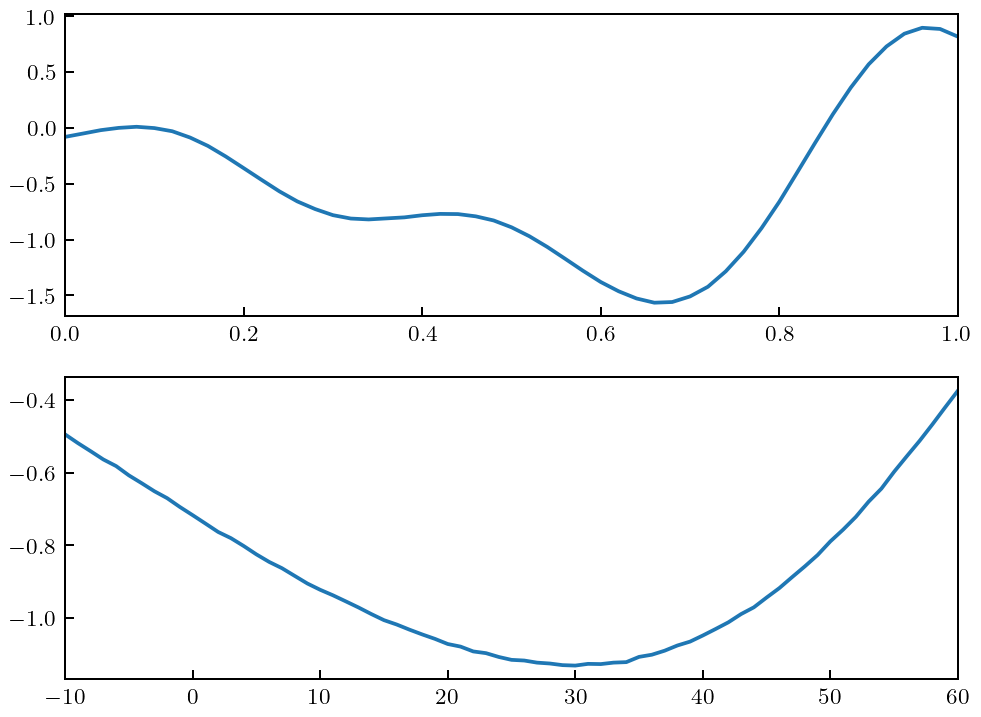

In [9]:
# plots coefficients at an order
fig, axes = plt.subplots(2, 1)
axes[0].plot(x_A, coeffs_all_A[0, :])
axes[1].plot(x_B, coeffs_all_B[0, :])

In [10]:
# generates data using coefficients and other EFT parameters (e.g., dimensionless expansion parameter)
data_all_A = gm.partials(
    coeffs = np.reshape(coeffs_all_A, (len(orders_all_array), len(x_A))).T, 
    # if Q is not constant, use next line
    ratio = np.reshape(ratio_A, (len(x_A))), 
    # if Q is constant, use next line
#     ratio = ratio_A,
    ref = ref, 
    orders = orders_all_array)
data_all_A = np.reshape(data_all_A.T, (len(orders_all_array), len(x_A)))

coeffs_A = coeffs_all_A[:n_orders, ...]
data_A = data_all_A[:n_orders, ...]

data_all_B = gm.partials(
    coeffs = np.reshape(coeffs_all_B, (len(orders_all_array), len(x_B))).T, 
    # if Q is not constant, use next line
    ratio = np.reshape(ratio_B, (len(x_B))), 
    # if Q is constant, use next line
#     ratio = ratio_B,
    ref = ref, 
    orders = orders_all_array)
data_all_B = np.reshape(data_all_B.T, (len(orders_all_array), len(x_B)))

coeffs_B = coeffs_all_B[:n_orders, ...]
data_B = data_all_B[:n_orders, ...]

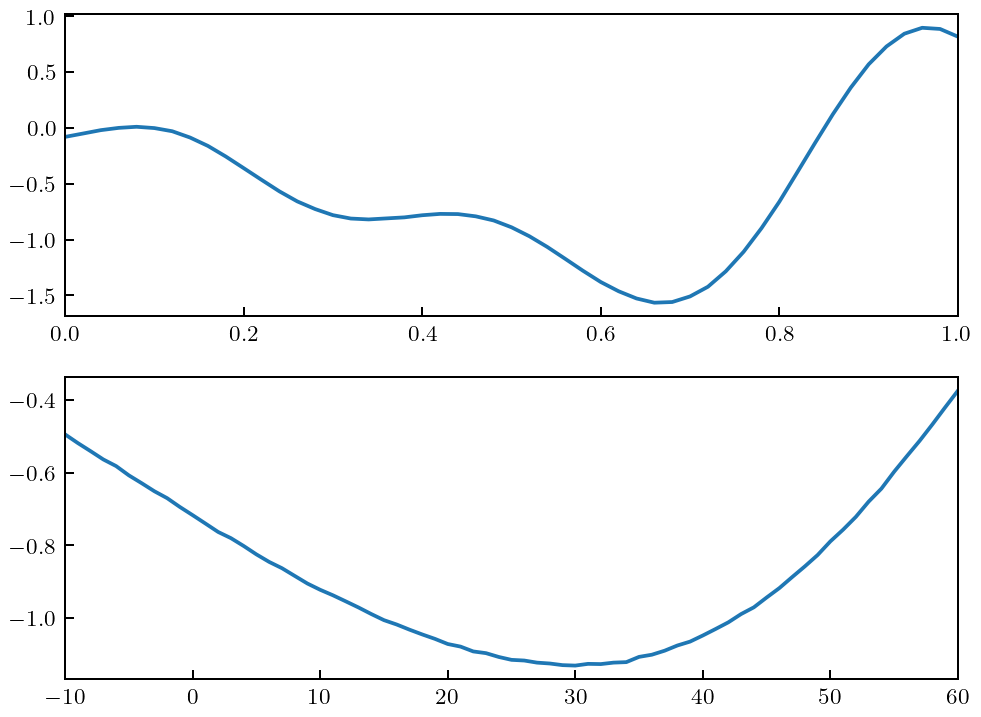

In [11]:
# plots data at an order
fig, axes = plt.subplots(2, 1)
axes[0].plot(x_A, data_all_A[0, :])
axes[1].plot(x_B, data_all_B[0, :])

In [12]:
# fits GPs to coefficients
gp_A.fit(np.flip(np.array(list(itertools.product(x_A_train))), axis = 1), 
        np.reshape(coeffs_A[:, np.isin(x_A, x_A_train)], 
                         (n_orders, -1)).T
      )
print(np.exp(gp_A.kernel_.theta))
gp_B.fit(np.flip(np.array(list(itertools.product(x_B_train))), axis = 1), 
        np.reshape(coeffs_B[:, np.isin(x_B, x_B_train)], 
                         (n_orders, -1)).T
      )
print(np.exp(gp_B.kernel_.theta))

[0.22015396]
[44.14624243]


C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:664: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  optima = np.array(optima)


In [13]:
# creates objects for the input spaces
DegBunch = InputSpaceBunch(
                "deg",
                input_fn_deg,
                None,
                r"$\theta$ (deg)",
                [
                    r"$",
                    "blah",
                    r"(\theta, E_{\mathrm{lab}}= ",
                    "blah",
                    "\,\mathrm{MeV})$",
                ],
            )

ElabBunch = InputSpaceBunch(
                "Elab",
                input_fn_tlab,
                None,
                r"$E_{\mathrm{lab}}$ (MeV)",
                [r"$", "blah", r"(E_{\mathrm{lab}})$"],
            )

# creates length scale objects
LengthScaleTlabInput = LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True)
LengthScaleTlabInput.make_guess(x = input_fn_tlab(x_A))
LengthScaleDegInput = LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True)
LengthScaleDegInput.make_guess(x = input_fn_deg(x_B))

# sets colors
cmaps = [plt.get_cmap(name) for name in ["Oranges", "Greens", "Blues", "Reds"]]
# colors = [cmap(0.55 - 0.1 * (i == 0)) for i, cmap in enumerate(cmaps)]
light_colors = [cmap(0.35) for cmap in cmaps]

# sets meshes for random variables
mpi_vals = np.linspace(0.01, 2, 30, dtype=np.dtype('f4'))
ls_tlab_vals = np.linspace(0.04, 1, 30, dtype=np.dtype('f4'))
ls_deg_vals = np.linspace(5, 80, 30, dtype=np.dtype('f4'))
lambda_vals = np.linspace(0.5, 10, 30, dtype=np.dtype('f4'))
Q_vals = np.linspace(0.01, 1, 30)
# if Q is not constant, use next two lines
mesh_cart_A = gm.cartesian(lambda_vals, np.log(ls_tlab_vals), mpi_vals)
mesh_cart_B = gm.cartesian(lambda_vals, np.log(ls_deg_vals), mpi_vals)
# if Q is constant, use next two lines
# mesh_cart_A = gm.cartesian(Q_vals, np.log(ls_tlab_vals))
# mesh_cart_B = gm.cartesian(Q_vals, np.log(ls_deg_vals))

# sets the RandomVariable objects
QVariable = RandomVariable(var=Q_vals,
                            user_val=0.3,
                            name='Q',
                            label="Q",
                            units="",
                            ticks=[0.2, 0.4, 0.6, 0.8],
                            logprior=np.zeros(len(Q_vals)),
                            logprior_name="Q_nologprior",
                            marg_bool = True)
LambdabVariable = RandomVariable(var=lambda_vals,
                            user_val=Lambda_b_mygp,
                            name='Lambdab',
                            label="\Lambda_{b}",
                            units="",
                            ticks=[2, 4, 6, 8],
                            logprior=np.zeros(len(lambda_vals)),
                            logprior_name="Lambdab_nologprior",
                            marg_bool = True)
LsDegVariable = RandomVariable(var=ls_deg_vals,
                            user_val=ls_B,
                            name='lsdeg',
                            label="\ell_{\Theta}",
                            units="",
                            ticks=[],
                            logprior=np.zeros(len(ls_deg_vals)),
                            logprior_name="ls_nologprior",
                            marg_bool=True)
LsTlabVariable = RandomVariable(var=ls_tlab_vals,
                            user_val=ls_A,
                            name='lstlab',
                            label="\ell_{T}",
                            units="",
                            ticks=[],
                            logprior=np.zeros(len(ls_tlab_vals)),
                            logprior_name="ls_nologprior",
                            marg_bool=True)
MpieffVariable = RandomVariable(var=mpi_vals,
                            user_val=mpi_mygp,
                            name='mpieff',
                            label="m_{\pi}",
                            units="",
                            ticks=[0.4, 0.8, 1.2, 1.6],
                            logprior=np.zeros(len(mpi_vals)),
                            logprior_name="mpieff_nologprior",
                            marg_bool = True)
# if Q is not constant, use next two lines
variables_array_A = np.array([LambdabVariable, LsTlabVariable, MpieffVariable])
variables_array_B = np.array([LambdabVariable, LsDegVariable, MpieffVariable])
# if Q is constant, use next two lines
# variables_array_A = np.array([QVariable, LsTlabVariable])
# variables_array_B = np.array([QVariable, LsDegVariable])

# creates observable objects
OBSBunchA = ObservableBunch(
            "OBSA",
            data_A,
#             np.swapaxes(data_A, 1, 2),
            [x_A, x_B],
            "ObsA.",
            "dimensionless",
            nn_interaction = "np",
        )
OBSBunchB = ObservableBunch(
            "OBSB",
            data_B,
#             np.swapaxes(data_B, 1, 2),
            [x_A,x_B],
            "ObsB.",
            "dimensionless",
            nn_interaction = "np",
        )

# creates objects for file names
FileNameMyGP = FileNaming(
                           Q_param = Q_param_mygp,
                           p_param = p_param_mygp,
                           filename_addendum = "_synthobs"
                          )

2024-05-27 19:08:53,574	INFO worker.py:1553 -- Started a local Ray instance.


Observable ObsA., variable Lambdab: MAP value = 5.7413793
Observable ObsA., variable Lambdab: mean = 6.481165440281972
Observable ObsA., variable Lambdab: std. dev. = 1.6223296616015206
Observable ObsA., variable Lambdab: MAP value = 5.7413793
Observable ObsA., variable Lambdab: mean = 6.179900933598724
Observable ObsA., variable Lambdab: std. dev. = 1.2690953495167714


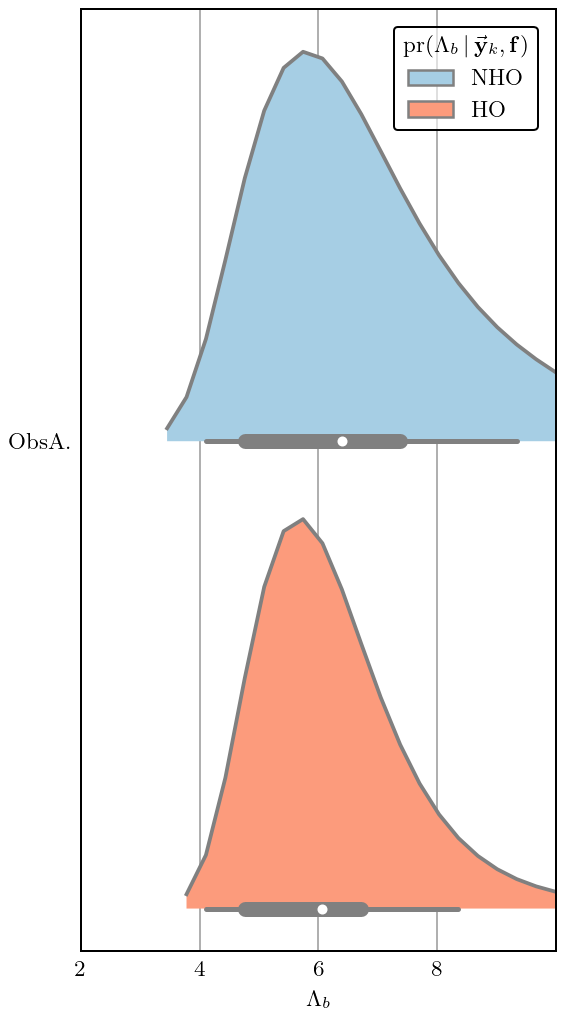

Observable ObsA., variable lstlab: MAP value = 0.20551725
Observable ObsA., variable lstlab: mean = 0.20103119625477464
Observable ObsA., variable lstlab: std. dev. = 0.026800849349906442
Observable ObsA., variable lstlab: MAP value = 0.20551725
Observable ObsA., variable lstlab: mean = 0.21379753153356515
Observable ObsA., variable lstlab: std. dev. = 0.024919239606522134


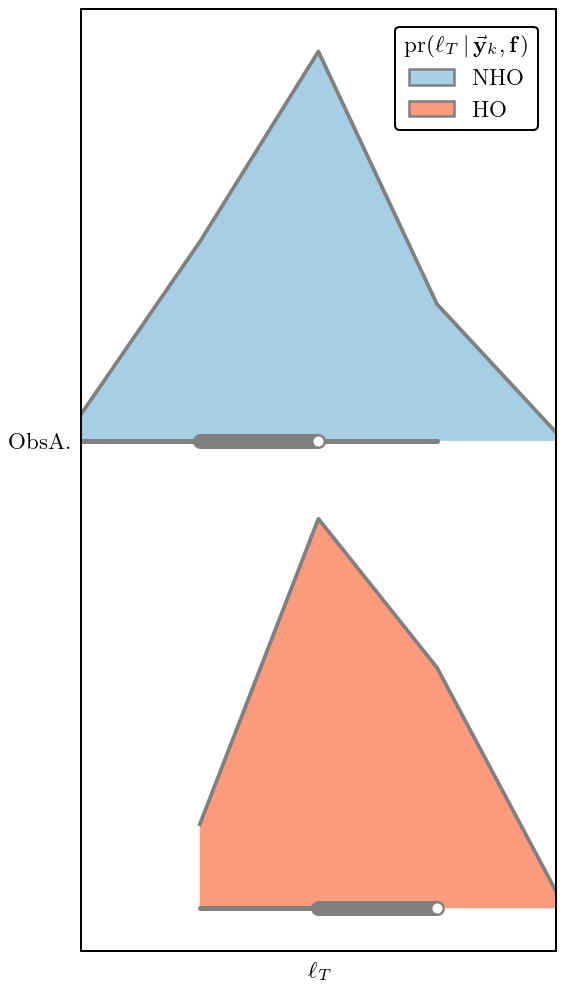

Observable ObsA., variable mpieff: MAP value = 0.69620687
Observable ObsA., variable mpieff: mean = 0.8682109490895128
Observable ObsA., variable mpieff: std. dev. = 0.3451006850217172
Observable ObsA., variable mpieff: MAP value = 0.6275862
Observable ObsA., variable mpieff: mean = 0.7345331879340471
Observable ObsA., variable mpieff: std. dev. = 0.2502305489234838


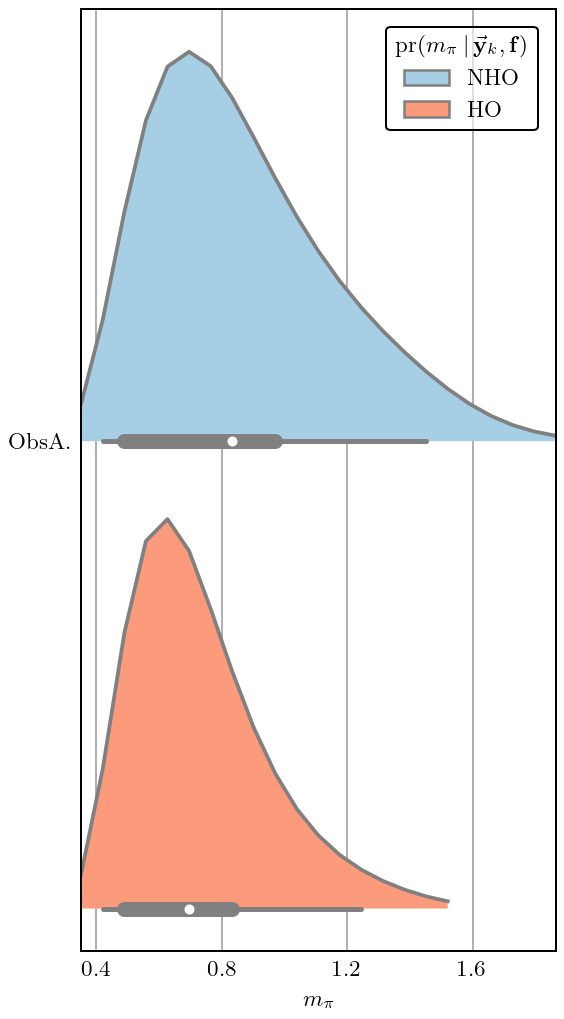

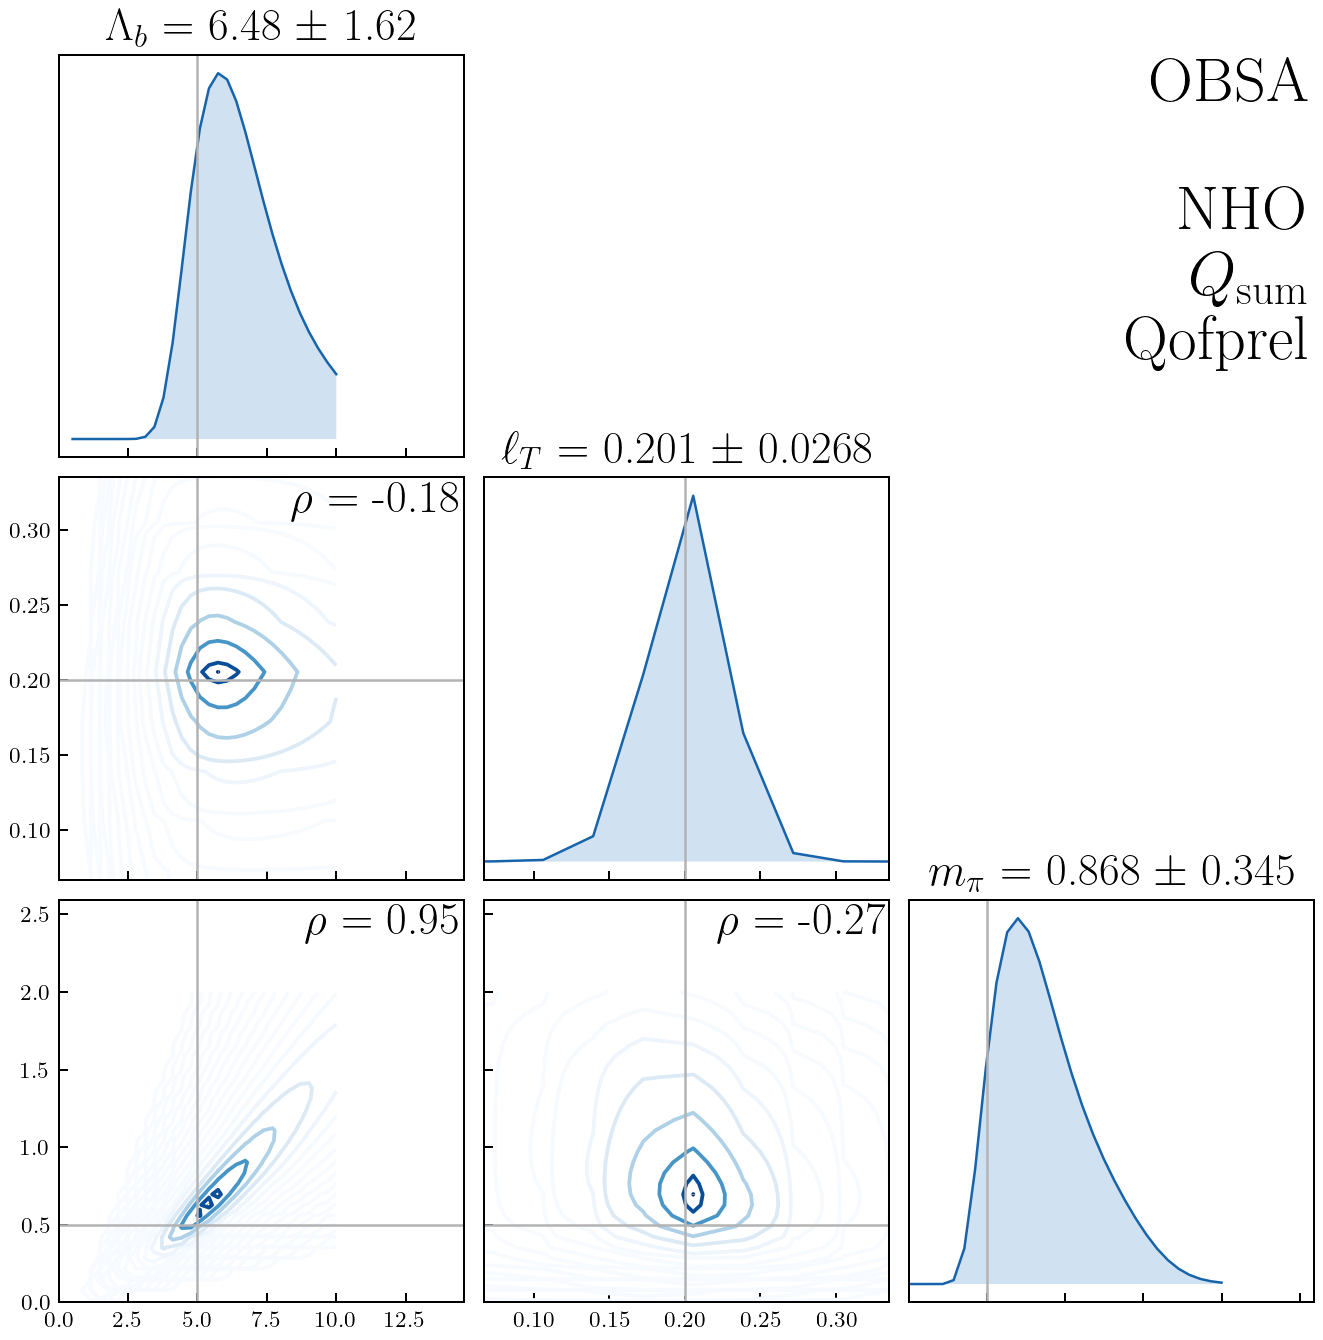

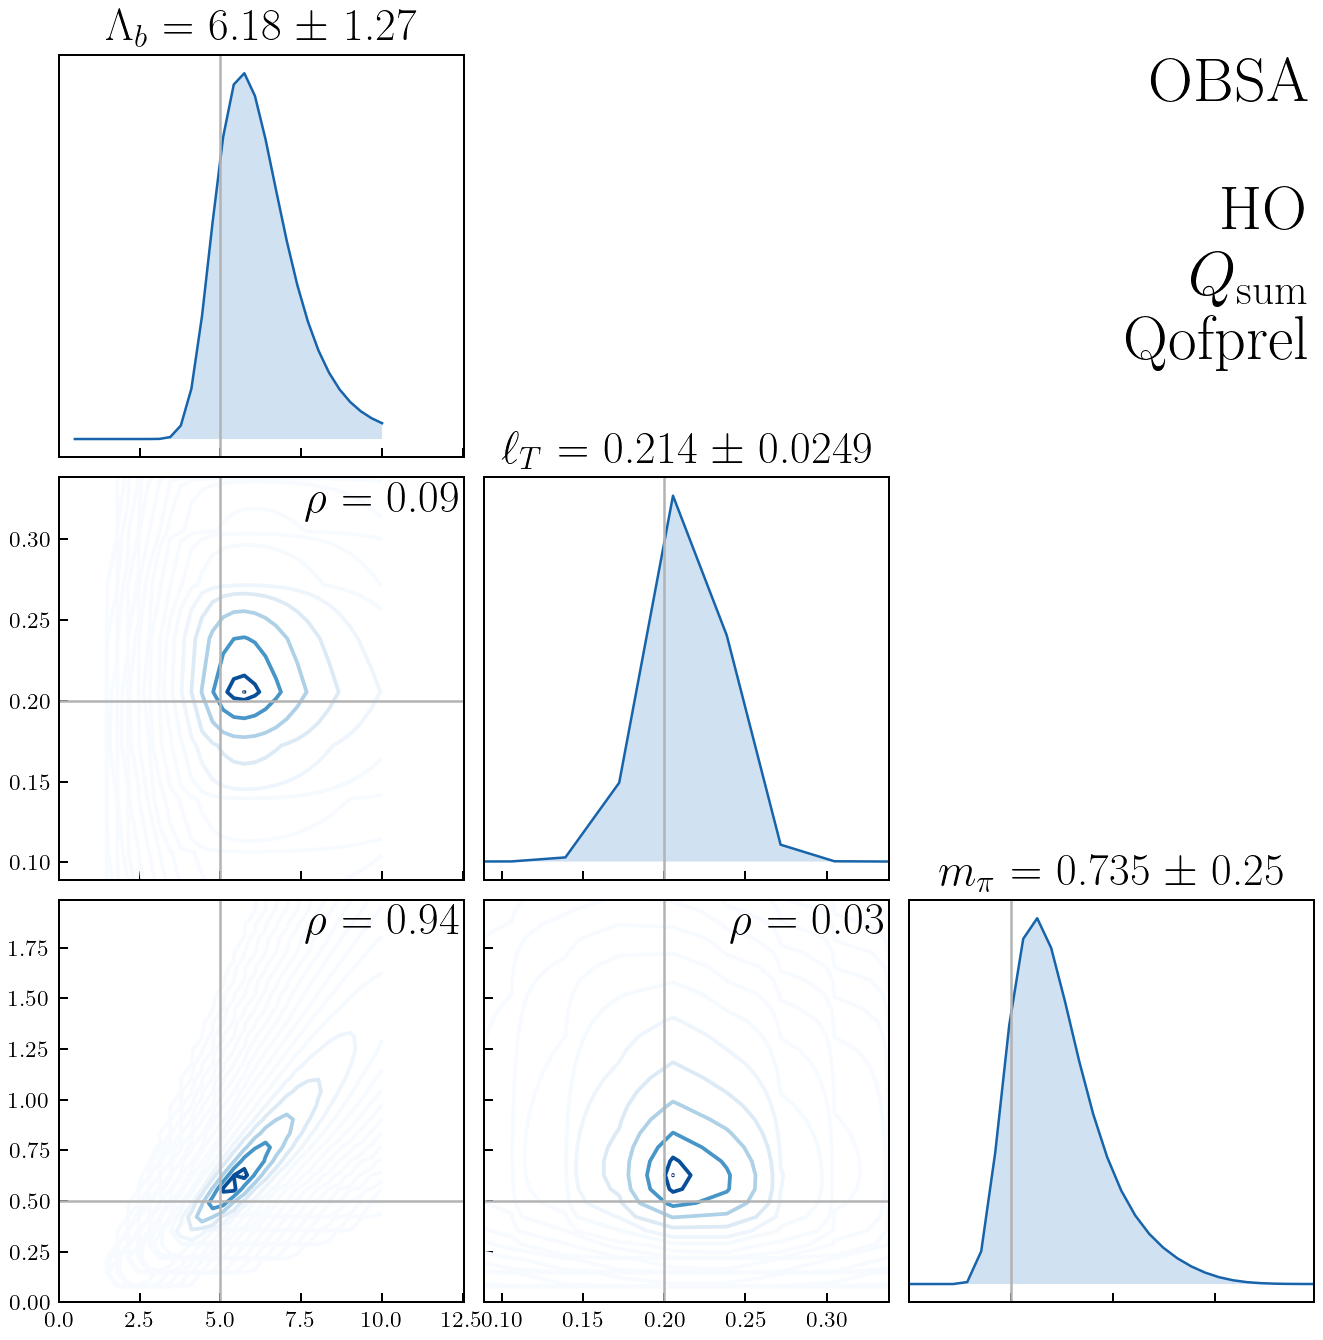

array([5.74137926, 6.48116544, 1.62232966, 5.74137926, 6.17990093,
       1.26909535, 0.20551725, 0.2010312 , 0.02680085, 0.20551725,
       0.21379753, 0.02491924, 0.69620687, 0.86821095, 0.34510069,
       0.62758619, 0.73453319, 0.25023055])

In [14]:
# calculates, plots, and saves posterior pdfs
plot_posteriors_curvewise(
    light_colors = light_colors,
    nn_orders_array = orders_array,
    nn_orders_full_array = orders_array,
    excluded = [],
    orders_labels_dict = {n_orders - 1 : r'HO', 
                         n_orders - 2 : r'NHO', 
                         n_orders - 3 : r'N$^{2}$HO', 
                         n_orders - 4 : r'N$^{3}$HO'},
    orders_names_dict = {n_orders - 1 : 'HO', 
                         n_orders - 2 : 'NHO', 
                         n_orders - 3 : 'N2HO', 
                         n_orders - 4 : 'N3HO'},
    nn_interaction = "np",
    center = 0,
    disp = 0,
    df = 1,
    std_est = 1,
    obs_data_grouped_list = [[OBSBunchA]],
    obs_name_grouped_list = ["OBSA"],
    obs_labels_grouped_list = [r'ObsA.'],
    mesh_cart_grouped_list = [[mesh_cart_A]],
    t_lab=x_A,
    t_lab_train_pts=x_A_train, 
    InputSpaceTlab=ElabBunch,
    degrees=x_B,
    degrees_train_pts=x_B_train,
    InputSpaceDeg=DegBunch,
    length_scale_list=[NSKernelParam(0.4, [0.05, 3])],
    length_scale_fixed = False,
    cbar_list = [NSKernelParam(1.0, [0.1, 10])],
    cbar_fixed = True,
    variables_array=variables_array_A,
    
    mom_fn = mom_fn_tlab, 
    mom_fn_kwargs = {},
    
    warping_fn = warping_fn,
    warping_fn_kwargs = {},
    
    cbar_fn = cbar_fn,
    cbar_fn_kwargs = cbar_fn_kwargs,
    
    # if Q is not constant, use next fourteen lines
    ratio_fn = ratio_fn_posterior_unit,
    ratio_fn_kwargs = {
                      "p_param" : p_param_mygp,
#                       "p_shape" : (len(x_B_train) * len(x_A_train)),
                      "Q_param" : Q_param_mygp,
                      "mpi_var" : mpi_mygp,
                      "lambda_var" : Lambda_b_mygp
    },
    log_likelihood_fn = log_likelihood,
    log_likelihood_fn_kwargs = {
                      "p_param" : p_param_mygp,
#                       "p_shape" : (len(x_B_train) * len(x_A_train)),
                      "Q_param" : Q_param_mygp
    },
    
    # if Q is constant, use next five lines
#     ratio_fn = ratio_fn_posterior_const,
#     ratio_fn_kwargs = {
#                       "Q" : ratio_A
#     },
#     log_likelihood_fn = log_likelihood_const,
#     log_likelihood_fn_kwargs = {},
    
    orders=2,
    
    whether_use_data=False,
    whether_save_data=False,
    whether_save_plots=False,
    
    FileName = FileNameMyGP
)

2024-05-27 19:09:20,359	INFO worker.py:1553 -- Started a local Ray instance.


Observable ObsB., variable Lambdab: MAP value = 4.4310346
Observable ObsB., variable Lambdab: mean = 4.538460932043479
Observable ObsB., variable Lambdab: std. dev. = 0.48866523605370993
Observable ObsB., variable Lambdab: MAP value = 4.7586207
Observable ObsB., variable Lambdab: mean = 4.754259907768844
Observable ObsB., variable Lambdab: std. dev. = 0.40054406187580804


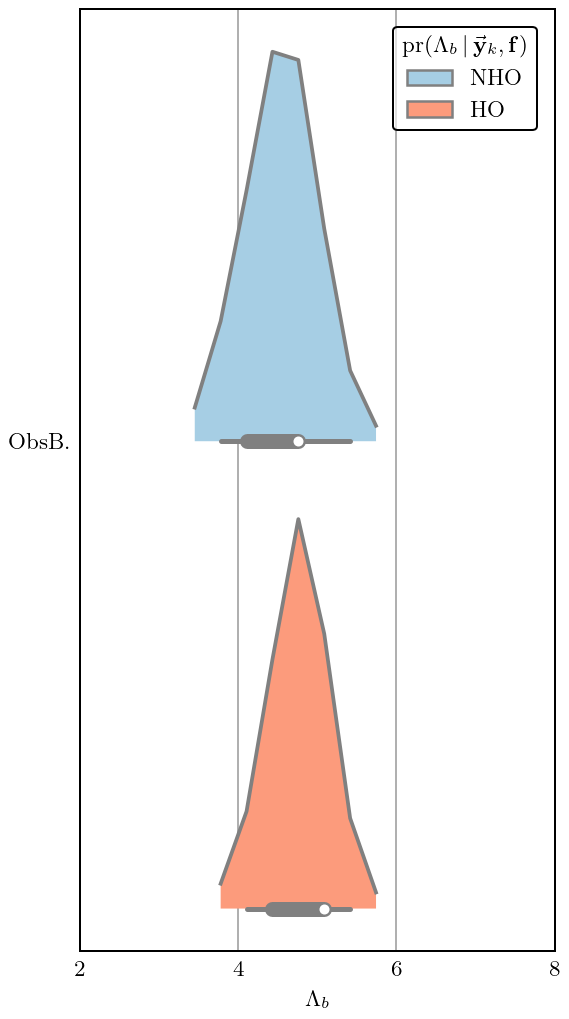

Observable ObsB., variable lsdeg: MAP value = 46.37931
Observable ObsB., variable lsdeg: mean = 46.83318283679774
Observable ObsB., variable lsdeg: std. dev. = 4.86010489539776
Observable ObsB., variable lsdeg: MAP value = 46.37931
Observable ObsB., variable lsdeg: mean = 46.69667974401046
Observable ObsB., variable lsdeg: std. dev. = 4.451252730770135


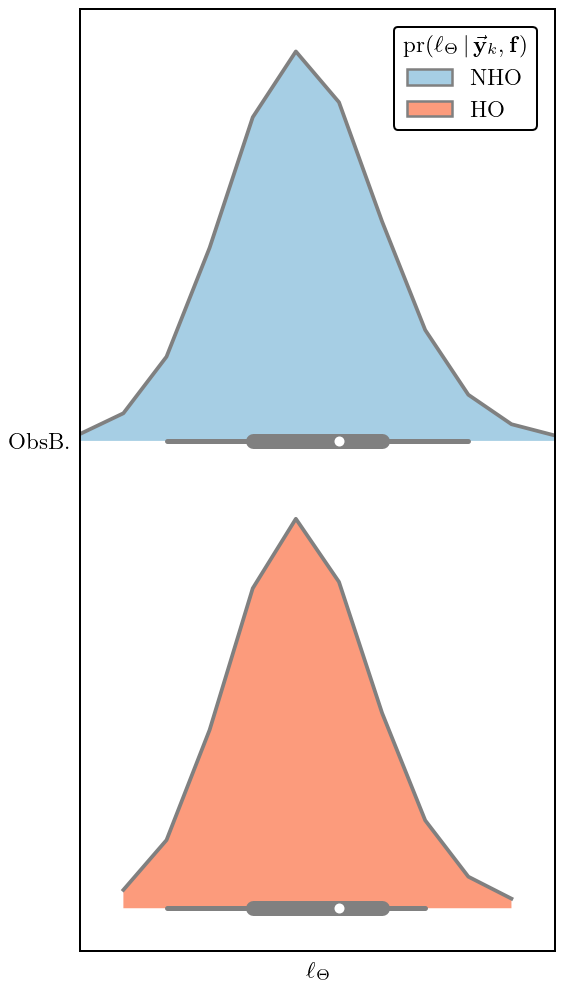

Observable ObsB., variable mpieff: MAP value = 0.49034482
Observable ObsB., variable mpieff: mean = 0.48064355755915333
Observable ObsB., variable mpieff: std. dev. = 0.030142991972306
Observable ObsB., variable mpieff: MAP value = 0.49034482
Observable ObsB., variable mpieff: mean = 0.4818413902003129
Observable ObsB., variable mpieff: std. dev. = 0.024577636487007684


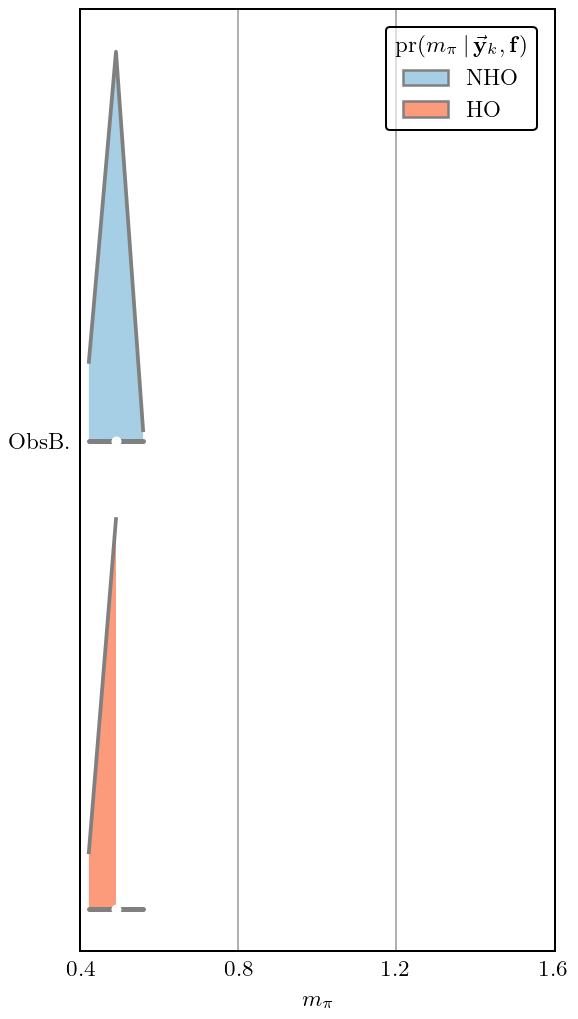

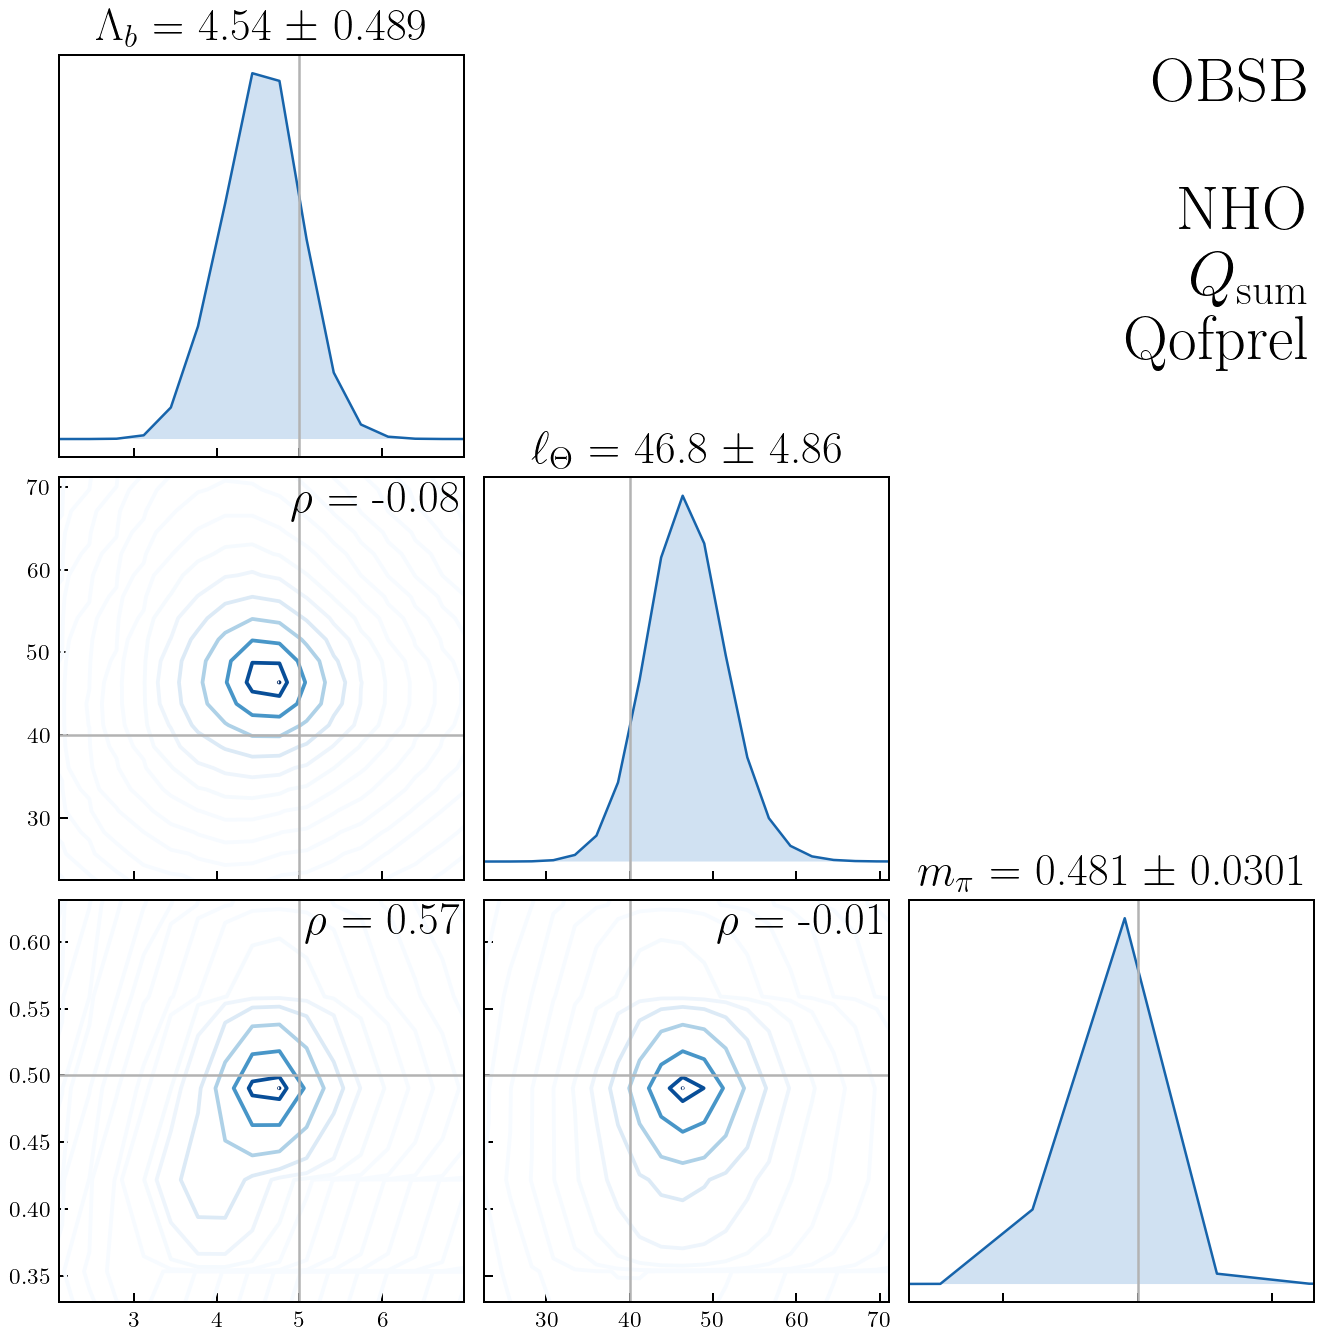

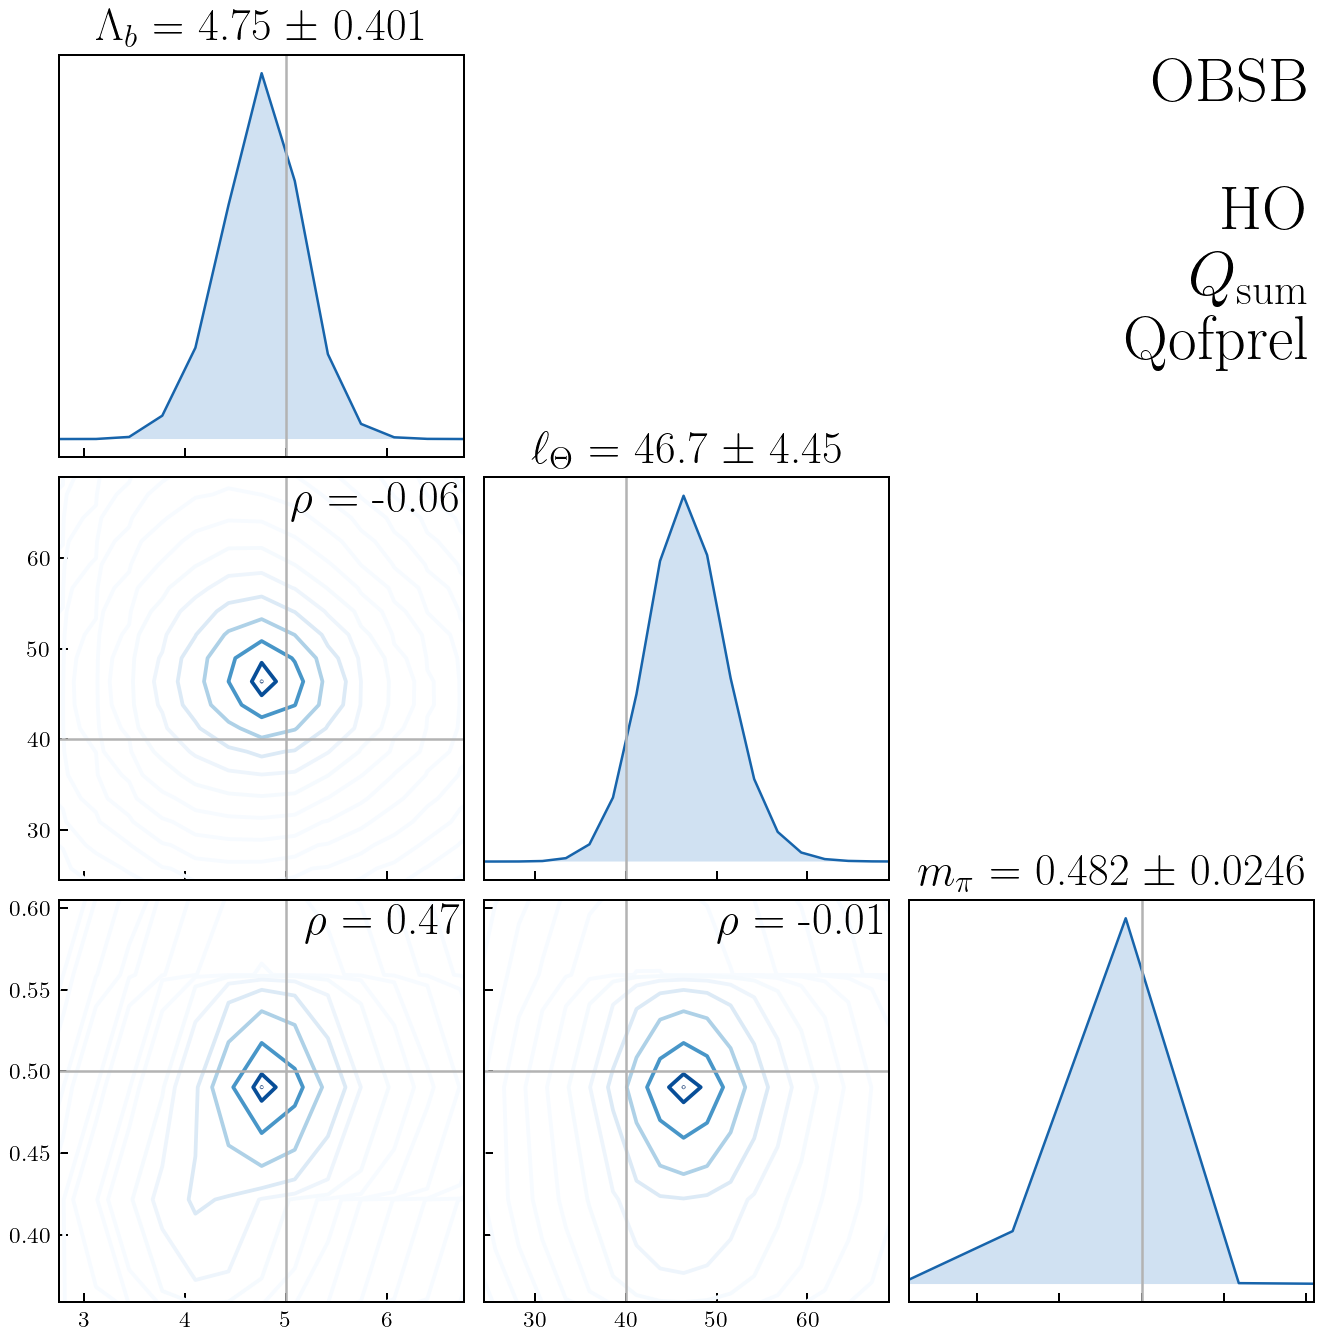

array([4.43103456e+00, 4.53846093e+00, 4.88665236e-01, 4.75862074e+00,
       4.75425991e+00, 4.00544062e-01, 4.63793106e+01, 4.68331828e+01,
       4.86010490e+00, 4.63793106e+01, 4.66966797e+01, 4.45125273e+00,
       4.90344822e-01, 4.80643558e-01, 3.01429920e-02, 4.90344822e-01,
       4.81841390e-01, 2.45776365e-02])

In [15]:
# calculates, plots, and saves posterior pdfs
plot_posteriors_curvewise(
    light_colors = light_colors,
    nn_orders_array = orders_array,
    nn_orders_full_array = orders_array,
    excluded = [],
    orders_labels_dict = {n_orders - 1 : r'HO', 
                         n_orders - 2 : r'NHO', 
                         n_orders - 3 : r'N$^{2}$HO', 
                         n_orders - 4 : r'N$^{3}$HO'},
    orders_names_dict = {n_orders - 1 : 'HO', 
                         n_orders - 2 : 'NHO', 
                         n_orders - 3 : 'N2HO', 
                         n_orders - 4 : 'N3HO'},
    nn_interaction = "np",
    center = 0,
    disp = 0,
    df = 1,
    std_est = 1,
    obs_data_grouped_list = [[OBSBunchB]],
    obs_name_grouped_list = ["OBSB"],
    obs_labels_grouped_list = [r'ObsB.'],
    mesh_cart_grouped_list = [[mesh_cart_B]],
    t_lab=x_A,
    t_lab_train_pts=x_A_train, 
    InputSpaceTlab=ElabBunch,
    degrees=x_B,
    degrees_train_pts=x_B_train,
    InputSpaceDeg=DegBunch,
    length_scale_list=[NSKernelParam(20, [5, 100])],
    length_scale_fixed = False,
    cbar_list = [NSKernelParam(1.0, [0.1, 10])],
    cbar_fixed = True,
    variables_array=variables_array_B,
    
    mom_fn = mom_fn_tlab, 
    mom_fn_kwargs = {},
    
    warping_fn = warping_fn,
    warping_fn_kwargs = {},
    
    cbar_fn = cbar_fn,
    cbar_fn_kwargs = cbar_fn_kwargs,
    
    # if Q is not constant, use next fourteen lines
    ratio_fn = ratio_fn_posterior_unit,
    ratio_fn_kwargs = {
                      "p_param" : p_param_mygp,
#                       "p_shape" : (len(x_B_train) * len(x_A_train)),
                      "Q_param" : Q_param_mygp,
                      "mpi_var" : mpi_mygp,
                      "lambda_var" : Lambda_b_mygp
    },
    log_likelihood_fn = log_likelihood,
    log_likelihood_fn_kwargs = {
                      "p_param" : p_param_mygp,
#                       "p_shape" : (len(x_B_train) * len(x_A_train)),
                      "Q_param" : Q_param_mygp
    },
    
    # if Q is constant, use next five lines
#     ratio_fn = ratio_fn_posterior_const,
#     ratio_fn_kwargs = {
#                       "Q" : ratio_B
#     },
#     log_likelihood_fn = log_likelihood_const,
#     log_likelihood_fn_kwargs = {},
    
    orders=2,
    
    whether_use_data=False,
    whether_save_data=False,
    whether_save_plots=False,
    
    FileName = FileNameMyGP
)

#### We show the results generated using a pointwise (as opposed to curvewise) approach for confirmation and comparison. These can only be computed when $Q$ is not constant and depends on $\Lambda_{b}$.

Observable ObsA., variable Lambdab: MAP value = 4.4310346
Observable ObsA., variable Lambdab: mean = 4.475898477917478
Observable ObsA., variable Lambdab: std. dev. = 0.4742732008684242
Observable ObsA., variable Lambdab: MAP value = 4.7586207
Observable ObsA., variable Lambdab: mean = 4.750532705104872
Observable ObsA., variable Lambdab: std. dev. = 0.387614194810008


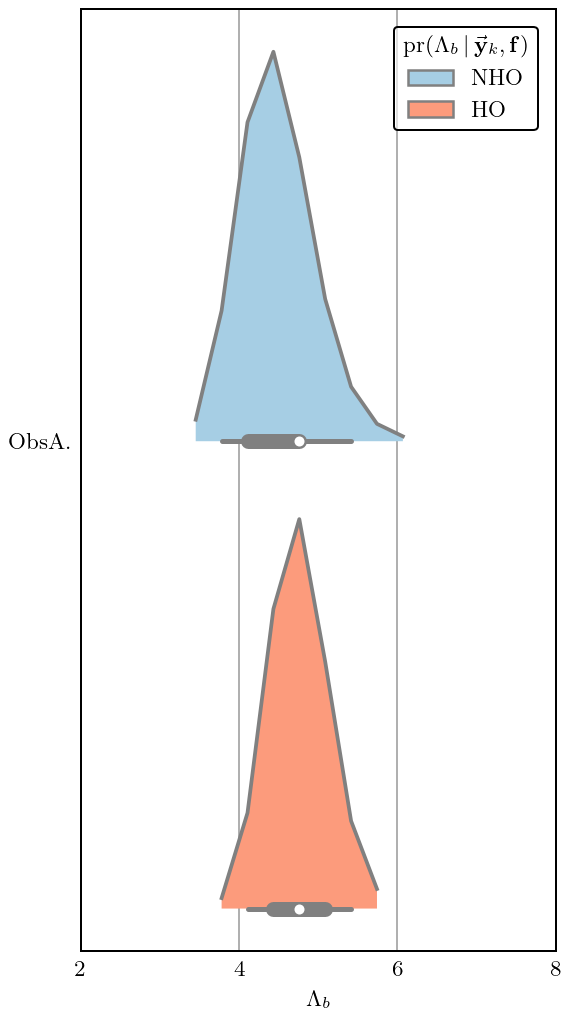

opt_vals_list = [4.7586207]


array([4.43103456, 4.47589848, 0.4742732 , 4.75862074, 4.75053271,
       0.38761419])

In [16]:
# calculates, plots, and saves posterior pdfs
plot_posteriors_pointwise(
    light_colors = light_colors,
    nn_orders_array = orders_array,
    nn_orders_full_array = orders_array,
    excluded = [],
    orders_labels_dict = {n_orders - 1 : r'HO', 
                         n_orders - 2 : r'NHO', 
                         n_orders - 3 : r'N$^{2}$HO', 
                         n_orders - 4 : r'N$^{3}$HO'},
    obs_data_grouped_list = [[OBSBunchA]],
    obs_name_grouped_list = ["OBSA"],
    obs_labels_grouped_list = [r'ObsA.'],
    t_lab=x_A,
    t_lab_train_pts=x_A_train, 
    InputSpaceTlab=ElabBunch,
    degrees=x_B,
    degrees_train_pts=x_B_train,
    InputSpaceDeg=DegBunch,
    variables_array=np.array([LambdabVariable]),
    
    mom_fn_tlab = mom_fn_tlab, 
    mom_fn_tlab_kwargs = {},
    
    mom_fn_degrees = mom_fn_degrees, 
    mom_fn_degrees_kwargs = {},
    
    p_fn = p_unit, 
    p_fn_kwargs = {},
    
    ratio_fn=Q_approx_unit,
    ratio_fn_kwargs={
            "Q_parametrization": Q_param_mygp,
            "m_pi": mpi_mygp,
        },
    
    orders=2,
    
    whether_save_plots=False,
    
    FileName = FileNameMyGP
)

Observable ObsB., variable Lambdab: MAP value = 4.4310346
Observable ObsB., variable Lambdab: mean = 4.476620385307117
Observable ObsB., variable Lambdab: std. dev. = 0.41427163011321816
Observable ObsB., variable Lambdab: MAP value = 4.7586207
Observable ObsB., variable Lambdab: mean = 4.699283634915362
Observable ObsB., variable Lambdab: std. dev. = 0.3728281812787119


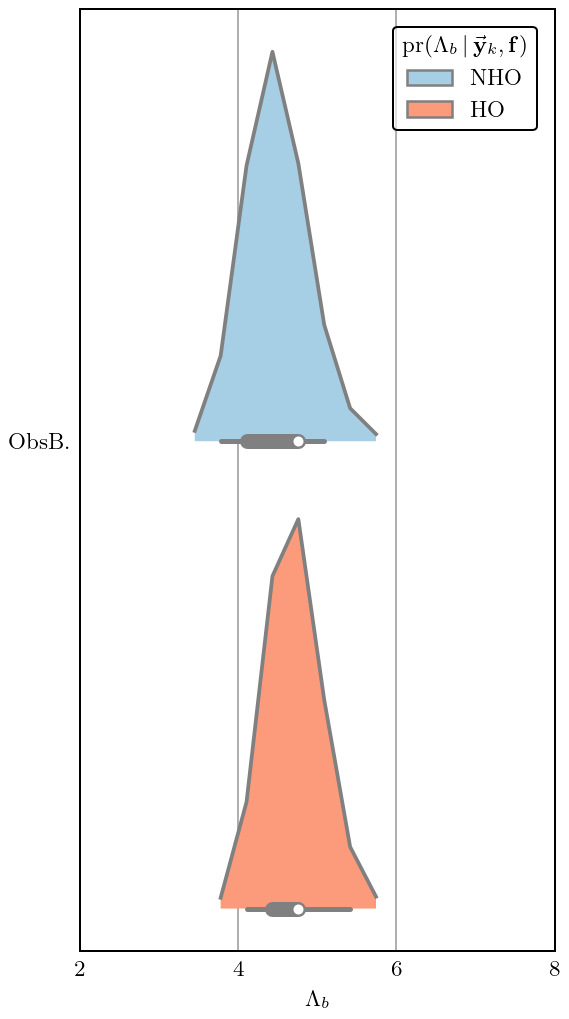

opt_vals_list = [4.7586207]


array([4.43103456, 4.47662039, 0.41427163, 4.75862074, 4.69928363,
       0.37282818])

In [17]:
# calculates, plots, and saves posterior pdfs
plot_posteriors_pointwise(
    light_colors = light_colors,
    nn_orders_array = orders_array,
    nn_orders_full_array = orders_array,
    excluded = [],
    orders_labels_dict = {n_orders - 1 : r'HO', 
                         n_orders - 2 : r'NHO', 
                         n_orders - 3 : r'N$^{2}$HO', 
                         n_orders - 4 : r'N$^{3}$HO'},
    obs_data_grouped_list = [[OBSBunchB]],
    obs_name_grouped_list = ["OBSB"],
    obs_labels_grouped_list = [r'ObsB.'],
    t_lab=x_A,
    t_lab_train_pts=x_A_train, 
    InputSpaceTlab=ElabBunch,
    degrees=x_B,
    degrees_train_pts=x_B_train,
    InputSpaceDeg=DegBunch,
    variables_array=np.array([LambdabVariable]),
    
    mom_fn_tlab = mom_fn_tlab, 
    mom_fn_tlab_kwargs = {},
    
    mom_fn_degrees = mom_fn_degrees, 
    mom_fn_degrees_kwargs = {},
    
    p_fn = p_unit, 
    p_fn_kwargs = {},
    
    ratio_fn=Q_approx_unit,
    ratio_fn_kwargs={
            "Q_parametrization": Q_param_mygp,
            "m_pi": mpi_mygp,
        },
    
    orders=2,
    
    whether_save_plots=False,
    
    FileName = FileNameMyGP
)

#### Now we create random data using a two-dimensional GP and re-extract the input parameters

In [18]:
# sets tlab ("x_A") and degrees ("x_B") meshes
x_A = np.linspace(0, 1, 51).round(decimals = 2) # grid for x-values
x_A_train = np.array([0.10, 0.30, 0.50, 0.70, 0.90])
x_B = np.linspace(-10, 60, 71).round(decimals = 2) # grid for x-values
x_B_train = np.array([4., 18., 32, 46.])

n_orders = 8    # Here we examine the case where we have info on some numer of non-trivial orders
final_order = 20  # We are going to treat some high order result as the final, converged answer
orders_array = np.arange(0, n_orders, 1, dtype = int)
orders_all_array = np.arange(0, final_order + 1, 1, dtype = int)

# The true values of the hyperparameters for generating the EFT coefficients
ls_A = 0.2
ls_B = 40
sd_gp = 1.0
sd_fixed = None
center = 0
ref = 1
nugget = 1e-10
df = 3
disp = 0
scale = 1.0
seed = 115

# sets 2D momentum mesh
p = p_unit(x_A, x_B)
Q_param_mygp = "sum"
p_param_mygp = "pprel"
mpi_mygp = 0.5
Lambda_b_mygp = 5
# if Q is constant, use next line
# ratio = 0.3
# if Q is not constant, use next line
ratio = Q_approx_unit(p, Q_param_mygp, Lambda_b_mygp, mpi_mygp)

# sets kernels
kernel_2d = RBF(length_scale=(ls_A, ls_B),
               length_scale_bounds=((ls_A / 4, ls_A * 4),
                                    (ls_B / 4, ls_B * 4))) + \
           WhiteKernel(1e-6, noise_level_bounds='fixed')

In [19]:
# The true values of the hyperparameters for generating the EFT coefficients
ls_A = 0.2
ls_B_mag = 200
ls_B_exp = 0.5
seed = 23

def scaling_fn(X,
               ls_array,
               ):
    X_shape = np.shape(X)
    X = np.reshape(X, (np.prod(X_shape[:-1]), ) + (X_shape[-1], ))
    ls = np.array([])
    try:
        for pt_idx, pt in enumerate(X):
            ls = np.append(ls, np.array([ls_array[0], ls_array[1] * (X[pt_idx, 0] + 11)**(-1. * ls_B_exp)
                                         ]))
            # ls = np.append(ls, ls_array)
    except:
        pass

    ls = np.reshape(ls, X_shape)
    # print("ls_array = " + str(ls_array))
    # print("ls = " + str(ls))

    return ls

scaling_fn_kwargs={}

# sets kernels
kernel_2d = NSRBF(length_scale=(ls_A, ls_B_mag, ls_B_exp),
               length_scale_bounds=((ls_A / 4, ls_A * 4),
                                    (ls_B_mag / 4, ls_B_mag * 4), 
#                                     (ls_B_exp / 4, ls_B_exp * 4)
                                   ), 
               length_scale_fn=scaling_fn,
               length_scale_fn_kwargs=scaling_fn_kwargs,
            ) + \
           NSWhiteKernel(1e-6, noise_level_bounds='fixed')

In [20]:
# creates Gaussian processes
gp = gm.ConjugateGaussianProcess(kernel = kernel_2d, 
                        center = center, df = df, disp = disp, 
                        scale = scale, nugget = 0, sd = sd_fixed)
# generates coefficients randomly up to final_order
coeffs_all = np.reshape(- gp.sample_y(np.array(list(itertools.product(x_A, x_B))), 
                         n_samples = final_order + 1, 
                         random_state = seed), (len(x_A), len(x_B), final_order + 1)).T

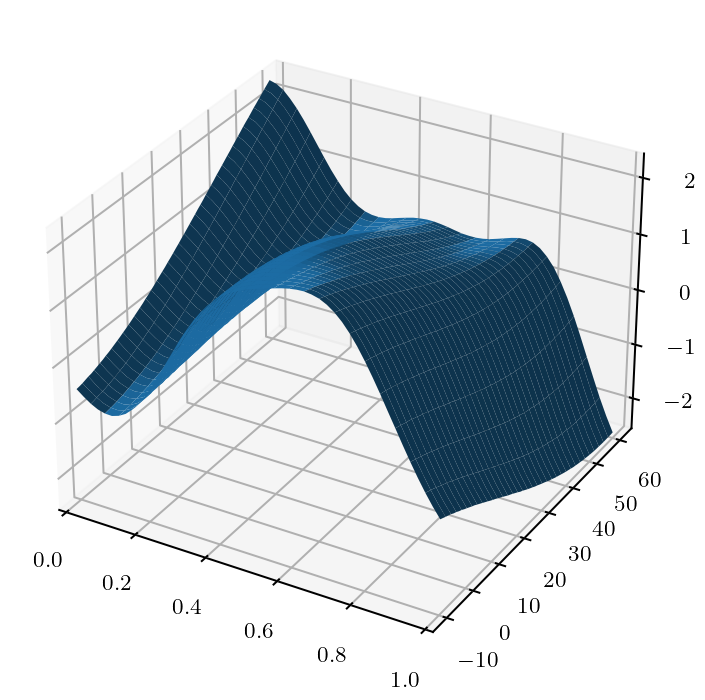

In [21]:
# plots coefficients at an order
fig = plt.figure()
ax = plt.axes(projection="3d")
(XA, XB) = np.meshgrid(x_A, x_B)
ax.plot_surface(XA, XB, coeffs_all[0, :, :])

In [22]:
# generates data using coefficients and other EFT parameters (e.g., dimensionless expansion parameter)
data_all = gm.partials(
    coeffs = np.reshape(coeffs_all, (len(orders_all_array), len(x_B) * len(x_A))).T, 
    # if Q is not constant, use next line
    ratio = np.reshape(ratio, (len(x_B) * len(x_A))), 
    # if Q is constant, use next line
#     ratio = ratio,
    ref = ref, 
    orders = orders_all_array)
data_all = np.reshape(data_all.T, (len(orders_all_array), len(x_B), len(x_A)))
diffs_all = np.array([data_all[0, ...], *np.diff(data_all, axis=1).T]).T
data_true = data_all[-1, ...]

coeffs = coeffs_all[:n_orders, ...]
data = data_all[:n_orders, ...]
diffs = diffs_all[:n_orders, ...]

C:\Users\pjmil\AppData\Local\Temp\ipykernel_33204\938811676.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  diffs_all = np.array([data_all[0, ...], *np.diff(data_all, axis=1).T]).T


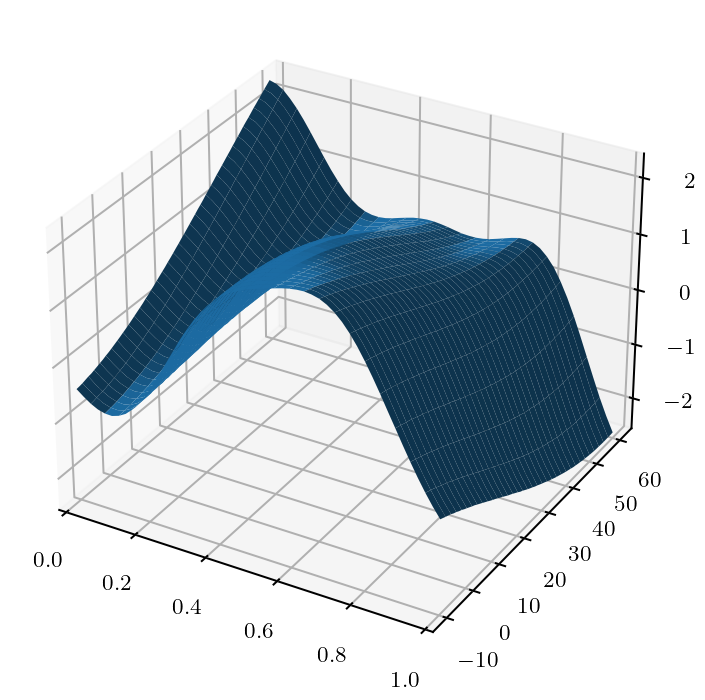

In [23]:
# plots data at an order
fig = plt.figure()
ax = plt.axes(projection="3d")
(XA, XB) = np.meshgrid(x_A, x_B)
ax.plot_surface(XA, XB, data_all[0, :, :])

In [24]:
# # fits GPs to coefficients
# gp.fit(np.flip(np.array(list(itertools.product(x_B_train, x_A_train))), axis = 1), 
#         np.reshape(coeffs[:, np.isin(x_B, x_B_train), :]
#                           [:, :, np.isin(x_A, x_A_train)], 
#                          (n_orders, -1)).T
#       )
# print(np.exp(gp.kernel_.theta))

In [25]:
gp.X_train_ = np.flip(np.array(list(itertools.product(x_B_train, x_A_train))), axis = 1)
gp.y_train_ = np.reshape(coeffs[:, np.isin(x_B, x_B_train), :]
                          [:, :, np.isin(x_A, x_A_train)], 
                         (n_orders, -1)).T
gp.orders_ = orders_all_array

In [26]:
# creates objects for the input spaces
DegBunch = InputSpaceBunch(
                "deg",
                input_fn_deg,
                None,
                r"$\theta$ (deg)",
                [
                    r"$",
                    "blah",
                    r"(\theta, E_{\mathrm{lab}}= ",
                    "blah",
                    "\,\mathrm{MeV})$",
                ],
            )

ElabBunch = InputSpaceBunch(
                "Elab",
                input_fn_tlab,
                None,
                r"$E_{\mathrm{lab}}$ (MeV)",
                [r"$", "blah", r"(E_{\mathrm{lab}})$"],
            )

# creates length scale objects
LengthScaleTlabInput = LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True)
LengthScaleTlabInput.make_guess(x = input_fn_tlab(x_A))
LengthScaleDegInput = LengthScale("1/16-1_fitted", 0.25, 0.25, 4, whether_fit=True)
LengthScaleDegInput.make_guess(x = input_fn_deg(x_B))

# sets colors
cmaps = [plt.get_cmap(name) for name in ["Oranges", "Greens", "Blues", "Reds"]]
# colors = [cmap(0.55 - 0.1 * (i == 0)) for i, cmap in enumerate(cmaps)]
light_colors = [cmap(0.35) for cmap in cmaps]

# sets meshes for random variables
mpi_vals = np.linspace(0.01, 2, 30, dtype=np.dtype('f4'))
ls_tlab_vals = np.linspace(0.04, 1, 30, dtype=np.dtype('f4'))
ls_deg_vals = np.linspace(5, 80, 30, dtype=np.dtype('f4'))
lambda_vals = np.linspace(0.5, 10, 30, dtype=np.dtype('f4'))
Q_vals = np.linspace(0.01, 1, 30)
# if Q is not constant, use next line
# mesh_cart = gm.cartesian(lambda_vals, np.log(ls_deg_vals), np.log(ls_tlab_vals), mpi_vals)
mesh_cart = gm.cartesian(lambda_vals, np.log(ls_tlab_vals), np.log(ls_deg_vals), mpi_vals)
# if Q is constant, use next line
# mesh_cart = gm.cartesian(Q_vals, np.log(ls_deg_vals), np.log(ls_tlab_vals))

ls_deg_mag_vals = np.linspace(150, 250, 31, dtype=np.dtype('f4'))
ls_deg_exp_vals = np.linspace(0.1, 1.0, 10, dtype=np.dtype('f4'))
mesh_cart = gm.cartesian(lambda_vals, np.log(ls_tlab_vals), np.log(ls_deg_mag_vals), mpi_vals)

# sets the RandomVariable objects
QVariable = RandomVariable(var=Q_vals,
                            user_val=0.3,
                            name='Q',
                            label="Q",
                            units="",
                            ticks=[0.2, 0.4, 0.6, 0.8],
                            logprior=np.zeros(len(Q_vals)),
                            logprior_name="nologprior",
                            marg_bool = True)
LambdabVariable = RandomVariable(var=lambda_vals,
                            user_val=Lambda_b_mygp,
                            name='Lambdab',
                            label="\Lambda_{b}",
                            units="",
                            ticks=[2, 4, 6, 8],
                            logprior=np.zeros(len(lambda_vals)),
                            logprior_name="nologprior",
                            marg_bool = True)
LsDegVariable = RandomVariable(var=ls_deg_vals,
                            user_val=ls_B,
                            name='lsdeg',
                            label="\ell_{\Theta}",
                            units="",
                            ticks=[],
                            logprior=np.zeros(len(ls_deg_vals)),
                            logprior_name="nologprior",
                            marg_bool=True)
LsDegMagVariable = RandomVariable(var=ls_deg_mag_vals,
                            user_val=ls_B_mag,
                            name='lsdegmag',
                            label="a",
                            units="",
                            ticks=[],
                            logprior=np.zeros(len(ls_deg_mag_vals)),
                            logprior_name="nologprior",
                            marg_bool=True)
LsDegExpVariable = RandomVariable(var=ls_deg_exp_vals,
                            user_val=ls_B_exp,
                            name='lsdegexp',
                            label="b",
                            units="",
                            ticks=[],
                            logprior=np.zeros(len(ls_deg_exp_vals)),
                            logprior_name="nologprior",
                            marg_bool=True)
LsTlabVariable = RandomVariable(var=ls_tlab_vals,
                            user_val=ls_A,
                            name='lstlab',
                            label="\ell_{T}",
                            units="",
                            ticks=[],
                            logprior=np.zeros(len(ls_tlab_vals)),
                            logprior_name="nologprior",
                            marg_bool=True)
MpieffVariable = RandomVariable(var=mpi_vals,
                            user_val=mpi_mygp,
                            name='mpieff',
                            label="m_{\pi}",
                            units="",
                            ticks=[0.4, 0.8, 1.2, 1.6],
                            logprior=np.zeros(len(mpi_vals)),
                            logprior_name="nologprior",
                            marg_bool = True)
# if Q is not constant, use next line
# variables_array = np.array([LambdabVariable, LsDegVariable, LsTlabVariable, MpieffVariable])
variables_array = np.array([LambdabVariable, LsTlabVariable, LsDegVariable, MpieffVariable])
# if Q is constant, use next line
# variables_array = np.array([QVariable, LsDegVariable, LsTlabVariable])

variables_array = np.array([LambdabVariable, LsTlabVariable, LsDegMagVariable, MpieffVariable])


# creates observable objects
OBSBunch = ObservableBunch(
            "OBS",
            np.swapaxes(data, 1, 2),
            [x_A, x_B],
            "Obs.",
            "dimensionless",
            nn_interaction = "np",
        )

# creates objects for file names
FileNameMyGP = FileNaming(
                           Q_param = Q_param_mygp,
                           p_param = p_param_mygp,
                           filename_addendum = "_synthobs"
                          )

2024-05-27 19:10:11,991	INFO worker.py:1553 -- Started a local Ray instance.
c:\users\pjmil\research\modern_nn_potentials\cheftgp\gaussianprocess.py:3503: RuntimeWarning: divide by zero encountered in log
  obs_loglike_partmarg = np.log(obs_like)
C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\numpy\core\fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\numpy\core\fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the nd

Observable Obs., variable Lambdab: MAP value = 4.7586207
Observable Obs., variable Lambdab: mean = 4.784273990266525
Observable Obs., variable Lambdab: std. dev. = 0.17704998715671963
Observable Obs., variable Lambdab: MAP value = 4.7586207
Observable Obs., variable Lambdab: mean = 4.815501672050396
Observable Obs., variable Lambdab: std. dev. = 0.15048082770065457


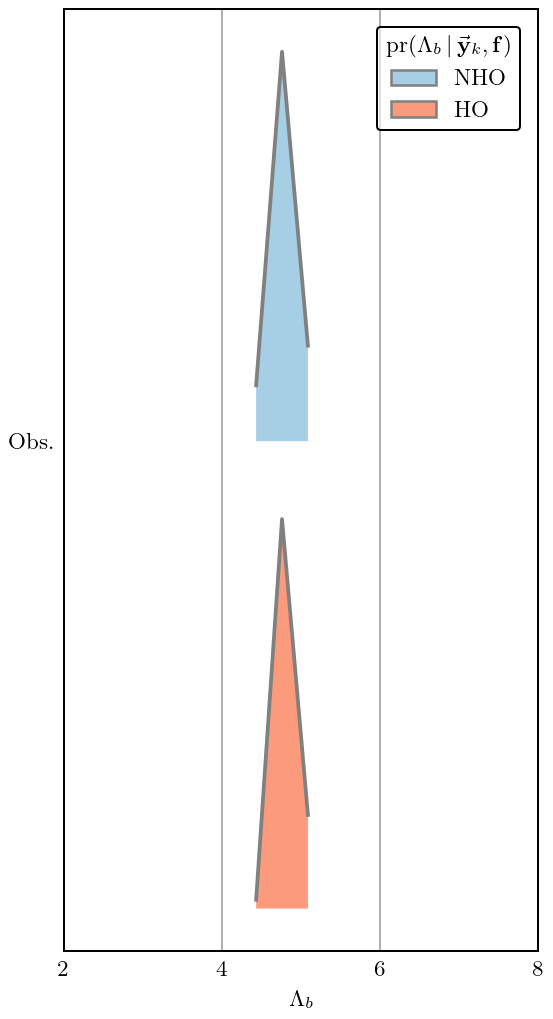

Observable Obs., variable lstlab: MAP value = 0.20551725
Observable Obs., variable lstlab: mean = 0.20236329562131902
Observable Obs., variable lstlab: std. dev. = 0.011573942321347062
Observable Obs., variable lstlab: MAP value = 0.20551725
Observable Obs., variable lstlab: mean = 0.19869512485413598
Observable Obs., variable lstlab: std. dev. = 0.01516651729301564


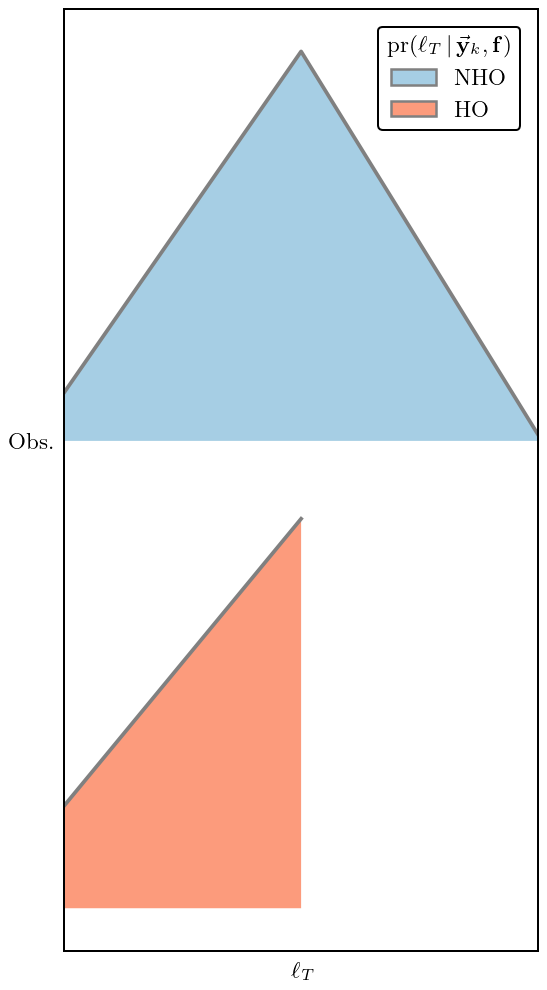

Observable Obs., variable lsdegmag: MAP value = 200.0
Observable Obs., variable lsdegmag: mean = 200.12022000110272
Observable Obs., variable lsdegmag: std. dev. = 8.832096520060235
Observable Obs., variable lsdegmag: MAP value = 203.33333
Observable Obs., variable lsdegmag: mean = 202.2896469726009
Observable Obs., variable lsdegmag: std. dev. = 8.195694195547063


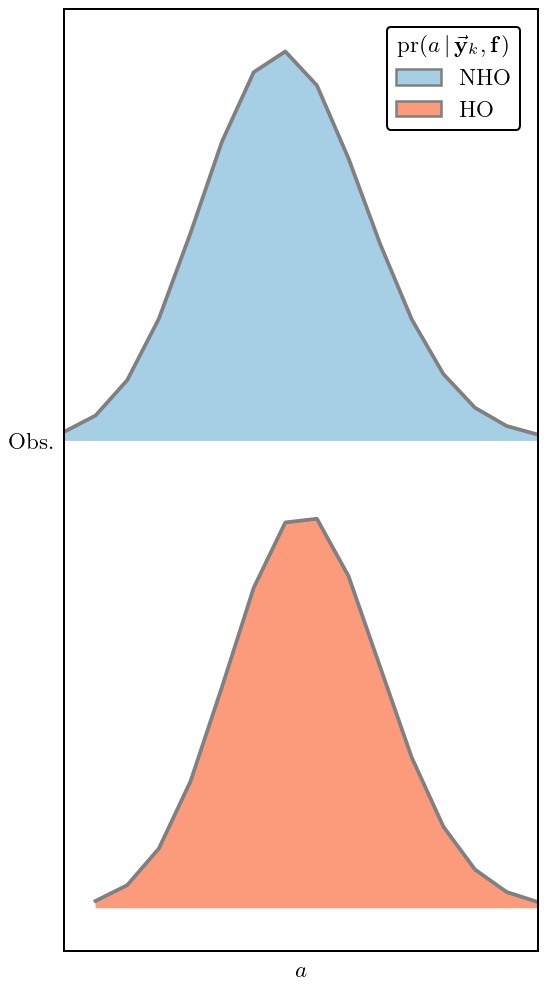

Observable Obs., variable mpieff: MAP value = 0.49034482
Observable Obs., variable mpieff: mean = 0.4903373594954936
Observable Obs., variable mpieff: std. dev. = 0.0016405217335429
Observable Obs., variable mpieff: MAP value = 0.49034482
Observable Obs., variable mpieff: mean = 0.49034500108571544
Observable Obs., variable mpieff: std. dev. = 0.00021984645929217457


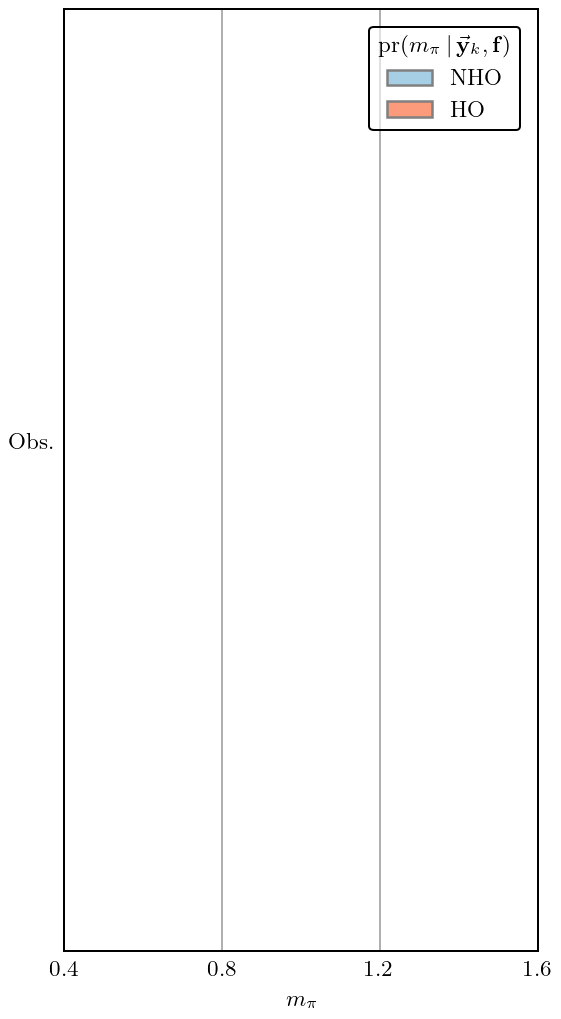

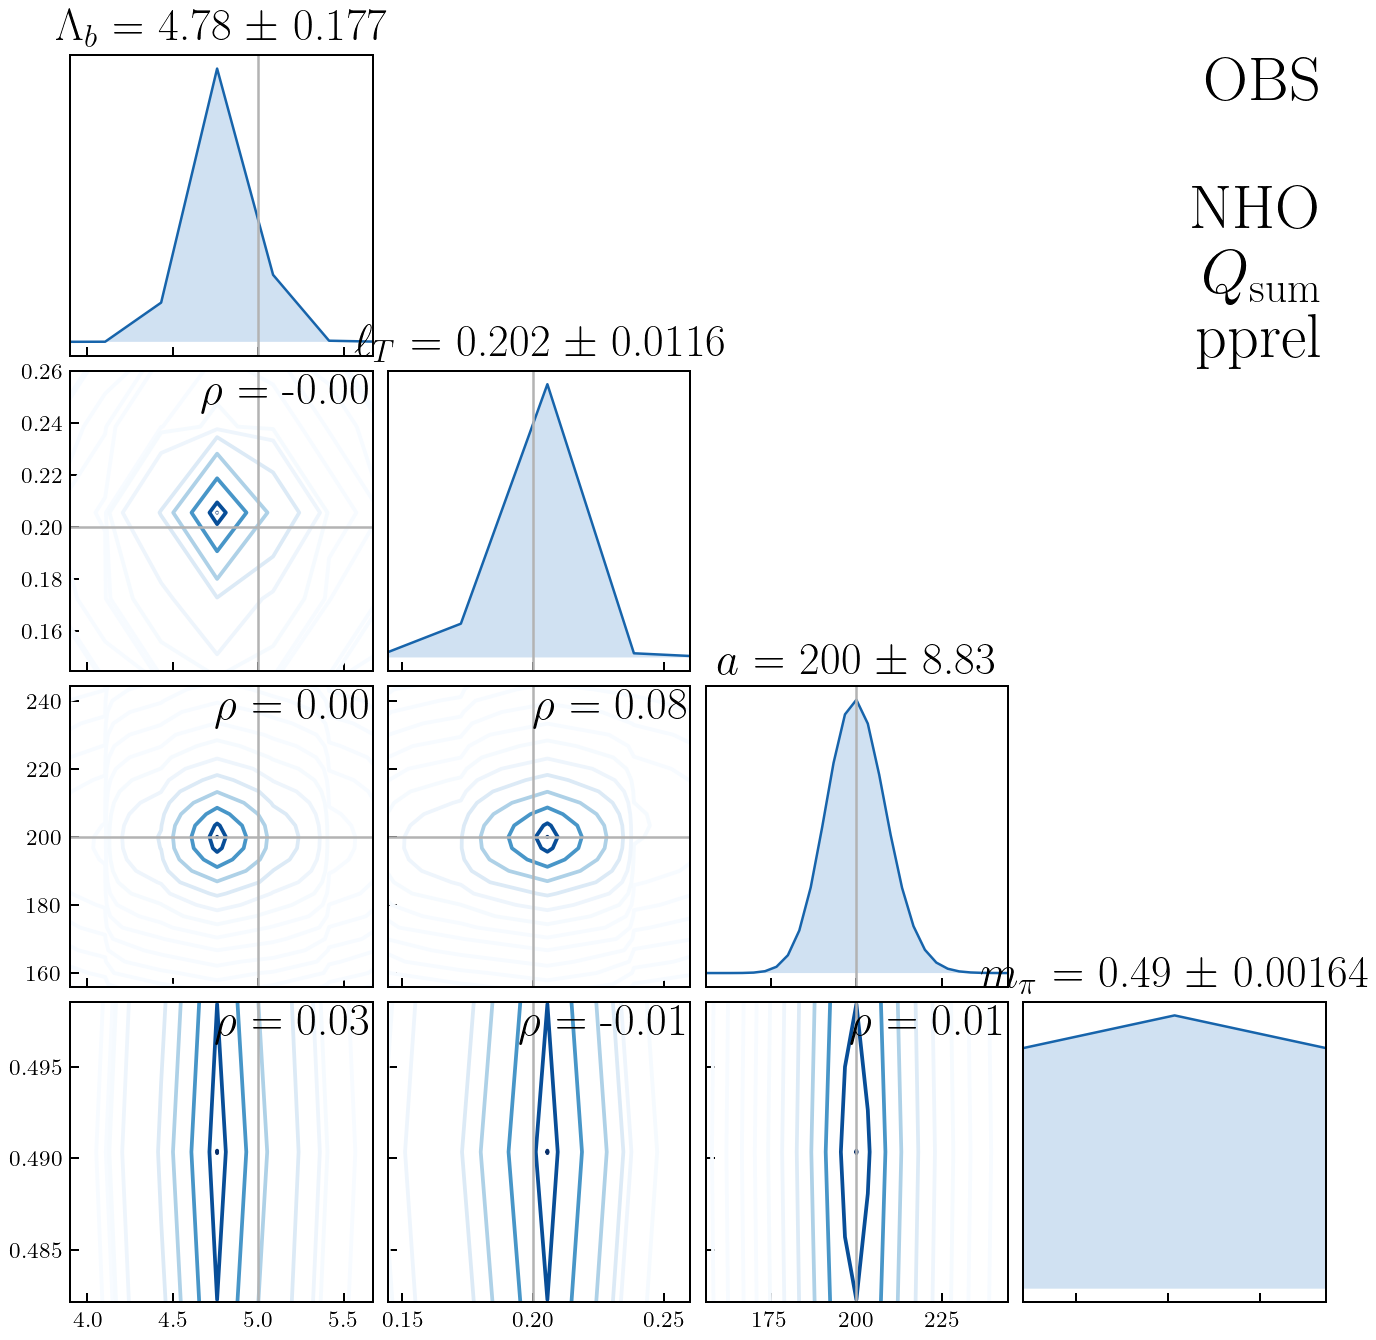

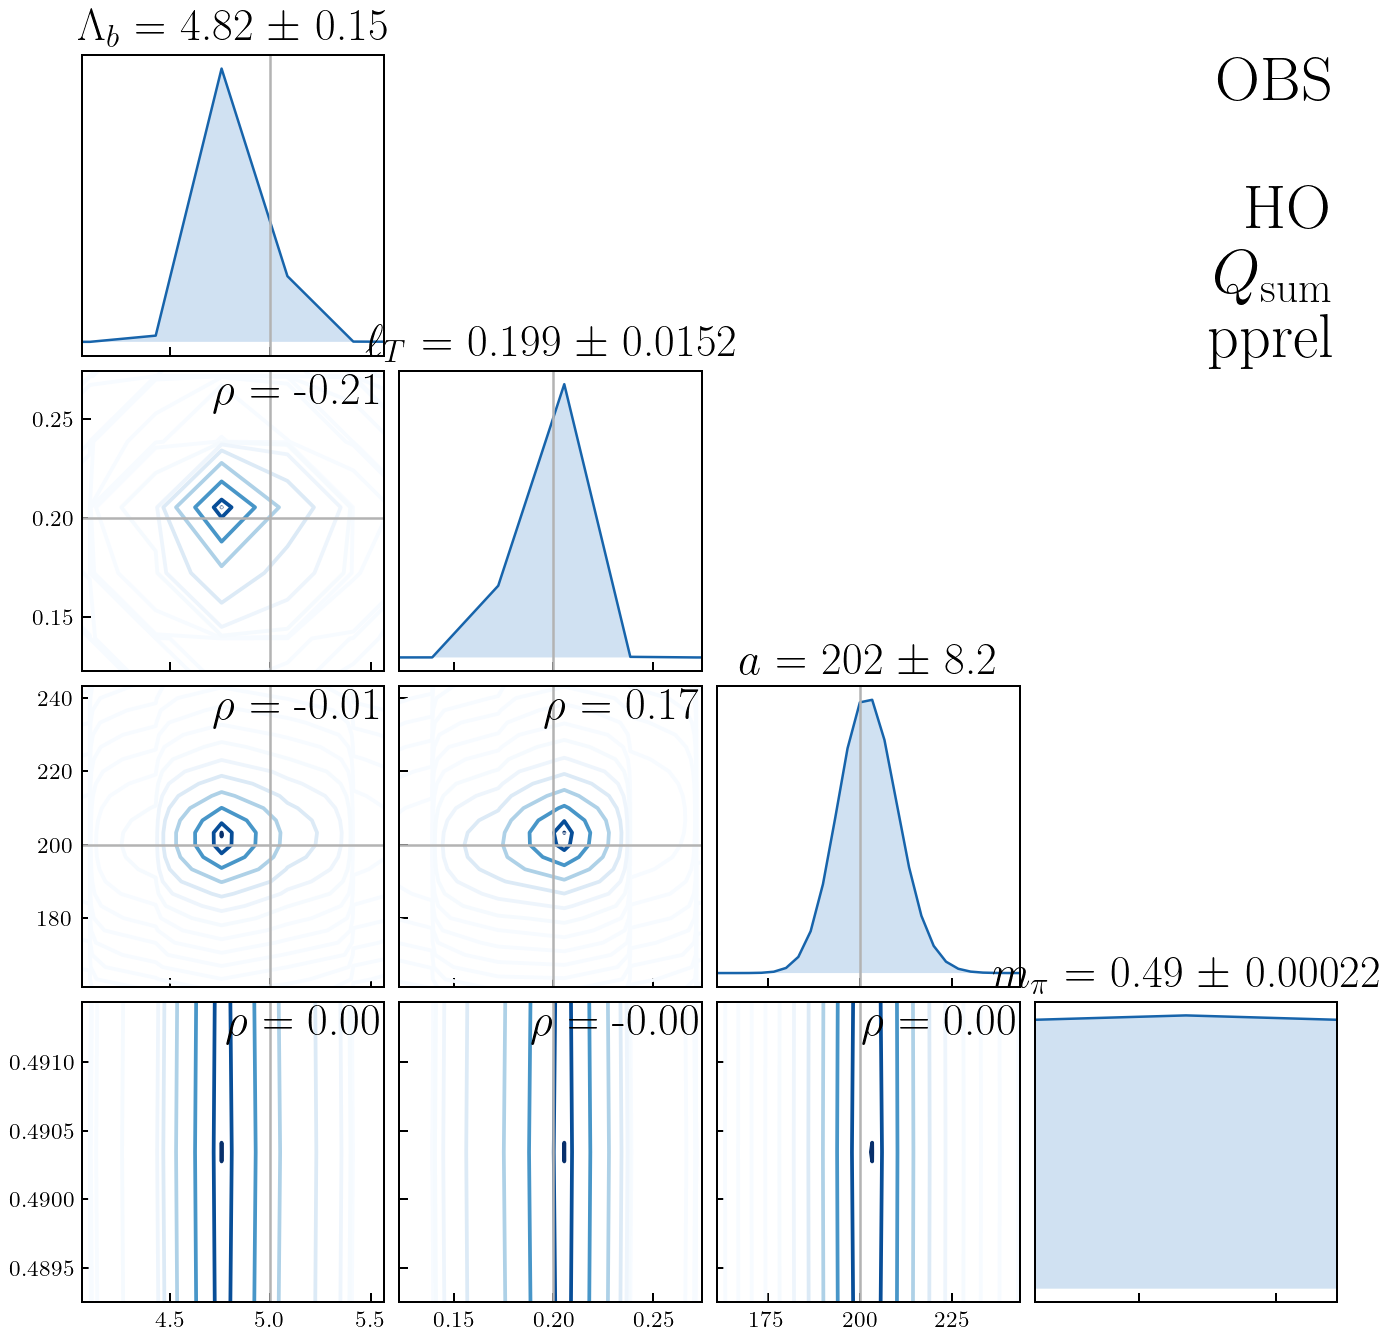

array([4.75862074e+00, 4.78427399e+00, 1.77049987e-01, 4.75862074e+00,
       4.81550167e+00, 1.50480828e-01, 2.05517247e-01, 2.02363296e-01,
       1.15739423e-02, 2.05517247e-01, 1.98695125e-01, 1.51665173e-02,
       2.00000000e+02, 2.00120220e+02, 8.83209652e+00, 2.03333328e+02,
       2.02289647e+02, 8.19569420e+00, 4.90344822e-01, 4.90337359e-01,
       1.64052173e-03, 4.90344822e-01, 4.90345001e-01, 2.19846459e-04])

In [27]:
# calculates, plots, and saves posterior pdfs
plot_posteriors_curvewise(
    light_colors = light_colors,
    nn_orders_array = orders_array,
    nn_orders_full_array = orders_array,
    excluded = [],
    orders_labels_dict = {n_orders - 1 : r'HO', 
                         n_orders - 2 : r'NHO', 
                         n_orders - 3 : r'N$^{2}$HO', 
                         n_orders - 4 : r'N$^{3}$HO'},
    orders_names_dict = {n_orders - 1 : 'HO', 
                         n_orders - 2 : 'NHO', 
                         n_orders - 3 : 'N2HO', 
                         n_orders - 4 : 'N3HO'},
    nn_interaction = "np",
    center = 0,
    disp = 0,
    df = 1,
    std_est = 1,
    obs_data_grouped_list = [[OBSBunch]],
    obs_name_grouped_list = ["OBS"],
    obs_labels_grouped_list = [r'Obs.'],
    mesh_cart_grouped_list = [[mesh_cart]],
    t_lab=x_A,
    t_lab_train_pts=x_A_train, 
    InputSpaceTlab=ElabBunch,
    degrees=x_B,
    degrees_train_pts=x_B_train,
    InputSpaceDeg=DegBunch,
#     length_scale_list = [NSKernelParam(0.4, [0.05, 3]),
#                         NSKernelParam(20, [5, 100])],
    length_scale_list = [NSKernelParam(0.4, [0.05, 3]),
                        NSKernelParam(100, [10, 1000]), 
#                         NSKernelParam(0.5, [0.1, 2.5])
                        ],
    length_scale_fixed = False,
    cbar_list = [NSKernelParam(1.0, [0.1, 10])],
    cbar_fixed = True,
    variables_array=variables_array,
    
    mom_fn = mom_fn_tlab, 
    mom_fn_kwargs = {},
    
    warping_fn = warping_fn,
    warping_fn_kwargs = {},
    
    scaling_fn = scaling_fn,
    scaling_fn_kwargs = scaling_fn_kwargs,
    
    cbar_fn = cbar_fn,
    cbar_fn_kwargs = cbar_fn_kwargs,
    
    # if Q is not constant, use next fourteen lines
    ratio_fn = ratio_fn_posterior_unit,
    ratio_fn_kwargs = {
                      "p_param" : p_param_mygp,
                      "p_shape" : (len(x_B_train) * len(x_A_train)),
                      "Q_param" : Q_param_mygp,
                      "mpi_var" : mpi_mygp,
                      "lambda_var" : Lambda_b_mygp
    },
    log_likelihood_fn = log_likelihood,
    log_likelihood_fn_kwargs = {
                      "p_param" : p_param_mygp,
                      "p_shape" : (len(x_B_train) * len(x_A_train)),
                      "Q_param" : Q_param_mygp
    },
    
    # if Q is constant, use next five lines
#     ratio_fn = ratio_fn_posterior_const,
#     ratio_fn_kwargs = {
#                       "Q" : ratio
#     },
#     log_likelihood_fn = log_likelihood_const,
#     log_likelihood_fn_kwargs = {},
    
    orders=2,
    
    whether_use_data=False,
    whether_save_data=False,
    whether_save_plots=False,
    
    FileName = FileNameMyGP
)

In [28]:
1/0

ZeroDivisionError: division by zero

#### We show the results generated using a pointwise (as opposed to curvewise) approach for confirmation and comparison. These can only be computed when $Q$ is not constant and depends on $\Lambda_{b}$.

In [ ]:
# calculates, plots, and saves posterior pdfs
plot_posteriors_pointwise(
    light_colors = light_colors,
    nn_orders_array = orders_array,
    nn_orders_full_array = orders_array,
    excluded = [],
    orders_labels_dict = {n_orders - 1 : r'HO', 
                         n_orders - 2 : r'NHO', 
                         n_orders - 3 : r'N$^{2}$HO', 
                         n_orders - 4 : r'N$^{3}$HO'},
    obs_data_grouped_list = [[OBSBunch]],
    obs_name_grouped_list = ["OBS"],
    obs_labels_grouped_list = [r'Obs.'],
    t_lab=x_A,
    t_lab_train_pts=x_A_train, 
    InputSpaceTlab=ElabBunch,
    degrees=x_B,
    degrees_train_pts=x_B_train,
    InputSpaceDeg=DegBunch,
    variables_array=np.array([LambdabVariable]),
    
    mom_fn_tlab = mom_fn_tlab, 
    mom_fn_tlab_kwargs = {},
    
    mom_fn_degrees = mom_fn_degrees, 
    mom_fn_degrees_kwargs = {},
    
    p_fn = p_unit, 
    p_fn_kwargs = {},
    
    ratio_fn=Q_approx_unit,
    ratio_fn_kwargs={
            "Q_parametrization": Q_param_mygp,
            "m_pi": mpi_mygp,
        },
    
    orders=2,
    
    whether_save_plots=False,
    
    FileName = FileNameMyGP
)

#### Combines 2 two-dimensional (randomly generated) observables and re-extracts the input parameters

In [ ]:
# sets seeds for observables 1 and 2
seed1 = 7
seed2 = 7

# The true values of the hyperparameters for generating the EFT coefficients
ls_A1 = 0.2
ls_B1 = 60
ls_A2 = 0.8
ls_B2 = 15

# sets 2D momentum mesh
p = p_unit(x_A, x_B)
Q_param_mygp = "sum"
p_param_mygp = "Qofprel"
mpi_mygp1 = 1.2
Lambda_b_mygp1 = 8
mpi_mygp2 = 0.3
Lambda_b_mygp2 = 2
# if Q is constant, use next two lines
# ratio1 = 0.9
# ratio2 = 0.1
# if Q is not constant, use next two lines
ratio1 = Q_approx_unit(p, Q_param_mygp, Lambda_b_mygp1, mpi_mygp1)
ratio2 = Q_approx_unit(p, Q_param_mygp, Lambda_b_mygp2, mpi_mygp2)

# sets kernels
kernel_2d1 = RBF(length_scale=(ls_A1, ls_B1),
               length_scale_bounds=((ls_A1 / 4, ls_A1 * 4),
                                    (ls_B1 / 4, ls_B1 * 4))) + \
           WhiteKernel(1e-6, noise_level_bounds='fixed')
kernel_2d2 = RBF(length_scale=(ls_A2, ls_B2),
               length_scale_bounds=((ls_A2 / 4, ls_A2 * 4),
                                    (ls_B2 / 4, ls_B2 * 4))) + \
           WhiteKernel(1e-6, noise_level_bounds='fixed')

# sets GP objects
gp1 = gm.ConjugateGaussianProcess(kernel = kernel_2d1, 
                        center = center, df = df, disp = disp, 
                        scale = scale, nugget = 0, sd = sd_fixed)
gp2 = gm.ConjugateGaussianProcess(kernel = kernel_2d2, 
                        center = center, df = df, disp = disp, 
                        scale = scale, nugget = 0, sd = sd_fixed)
coeffs_all1 = np.reshape(- gp1.sample_y(np.array(list(itertools.product(x_A, x_B))), 
                         n_samples = final_order + 1, 
                         random_state = seed1), (len(x_A), len(x_B), final_order + 1)).T
coeffs_all2 = np.reshape(- gp2.sample_y(np.array(list(itertools.product(x_A, x_B))), 
                         n_samples = final_order + 1, 
                         random_state = seed2), (len(x_A), len(x_B), final_order + 1)).T

# creates data for observables 1 and 2
data_all1 = gm.partials(
    coeffs = np.reshape(coeffs_all1, (len(orders_all_array), len(x_B) * len(x_A))).T,
    # if Q is not constant, use next line
    ratio = np.reshape(ratio1, (len(x_B) * len(x_A))),
    # if Q is constant, use next line
#     ratio = ratio1,
    ref = ref, 
    orders = orders_all_array)
data_all2 = gm.partials(
    coeffs = np.reshape(coeffs_all2, (len(orders_all_array), len(x_B) * len(x_A))).T, 
    # if Q is not constant, use next line
    ratio = np.reshape(ratio2, (len(x_B) * len(x_A))), 
    # if Q is constant, use next line
#     ratio = ratio2,
    ref = ref, 
    orders = orders_all_array)

data_all1 = np.reshape(data_all1.T, (len(orders_all_array), len(x_B), len(x_A)))
data1 = data_all1[:n_orders, ...]
data_all2 = np.reshape(data_all2.T, (len(orders_all_array), len(x_B), len(x_A)))
data2 = data_all2[:n_orders, ...]

# sets objects for observables 1 and 2
OBS1Bunch = ObservableBunch(
            "OBS1",
            np.swapaxes(data1, 1, 2),
            [x_A, x_B],
            "Obs1.",
            "dimensionless",
            nn_interaction = "np",
        )
OBS2Bunch = ObservableBunch(
            "OBS2",
            np.swapaxes(data2, 1, 2),
            [x_A, x_B],
            "Obs2.",
            "dimensionless",
            nn_interaction = "np",
        )

# calculates, plots, and saves posterior pdfs for observables 1 and 2 and their combination
plot_posteriors_curvewise(
    light_colors = light_colors,
    nn_orders_array = orders_array,
    nn_orders_full_array = orders_array,
    excluded = [],
    orders_labels_dict = {n_orders - 1 : r'HO', 
                         n_orders - 2 : r'NHO', 
                         n_orders - 3 : r'N$^{2}$HO', 
                         n_orders - 4 : r'N$^{3}$HO'},
    orders_names_dict = {n_orders - 1 : 'HO', 
                         n_orders - 2 : 'NHO', 
                         n_orders - 3 : 'N2HO', 
                         n_orders - 4 : 'N3HO'},
    nn_interaction = "np",
    center = 0,
    disp = 0,
    df = 1,
    std_est = 1,
    obs_data_grouped_list = [[OBS1Bunch], [OBS2Bunch], [OBS1Bunch, OBS2Bunch]],
    obs_name_grouped_list = ["OBS1", "OBS2", "ALLOBS"],
    obs_labels_grouped_list = [r'Obs1.', r'Obs2.', r'Obs.'],
    mesh_cart_grouped_list = [[mesh_cart], [mesh_cart], [mesh_cart, mesh_cart]],
    t_lab=x_A,
    t_lab_train_pts=x_A_train, 
    InputSpaceTlab=ElabBunch,
    degrees=x_B,
    degrees_train_pts=x_B_train,
    InputSpaceDeg=DegBunch,
    length_scale_list = [NSKernelParam(0.4, [0.05, 3]),
                        NSKernelParam(20, [5, 100])],
    length_scale_fixed = False,
    cbar_list = [NSKernelParam(1.0, [0.1, 10])],
    cbar_fixed = True,
    variables_array=variables_array,
    
    mom_fn = mom_fn_tlab, 
    mom_fn_kwargs = {},
    
    warping_fn = warping_fn,
    warping_fn_kwargs = {},
    
    cbar_fn = cbar_fn,
    cbar_fn_kwargs = cbar_fn_kwargs,
    
    # if Q is not constant, use next fourteen lines
    ratio_fn = ratio_fn_posterior_unit,
    ratio_fn_kwargs = {
                      "p_param" : p_param_mygp,
#                       "p_shape" : (len(x_B_train) * len(x_A_train)),
                      "Q_param" : Q_param_mygp,
                      "mpi_var" : mpi_mygp,
                      "lambda_var" : Lambda_b_mygp
    },
    log_likelihood_fn = log_likelihood,
    log_likelihood_fn_kwargs = {
                      "p_param" : p_param_mygp,
#                       "p_shape" : (len(x_B_train) * len(x_A_train)),
                      "Q_param" : Q_param_mygp
    },
    
    # if Q is constant, use next five lines
#     ratio_fn = ratio_fn_posterior_const,
#     ratio_fn_kwargs = {
#                       "Q" : 0.5
#     },
#     log_likelihood_fn = log_likelihood_const,
#     log_likelihood_fn_kwargs = {},
    
    orders=1,
    
    whether_use_data=False,
    whether_save_data=False,
    whether_save_plots=False,
    
    FileName = FileNameMyGP
)

# Marginalizing; extracting the mean, standard deviation, and correlation coefficient of; and plotting two-dimensional probability distributions

functions tested: marginalize_likelihoods, plot_marg_posteriors, plot_corner_posteriors

In [ ]:
# sets the X and Y meshes
x_coord = np.linspace(0, 12, 400)
y_coord = np.linspace(6, 18, 500)
cart = np.transpose([np.tile(x_coord, len(y_coord)), np.repeat(y_coord, len(x_coord))])

# creates 2D normal distribution over meshes, with given mean and covariance matrix
z = np.array(np.reshape(multivariate_normal.pdf(cart, mean = [6, 13], cov = [[2.0, 0.3], [0.3, 1.8]]), 
               (len(y_coord), len(x_coord))))
z_list = []
z_list.append(z)

# plots contents of z_list
fig, ax = plt.subplots()
ax.pcolormesh(x_coord, y_coord, np.log(z))

# prints the correlation coefficient
print("correlation coefficient (rho) = " + str(correlation_coefficient(x_coord, y_coord, z)))

XVariable = RandomVariable(var=y_coord,
                             user_val=13,
                             name='X',
                             label="X",
                             units="",
                             ticks=[9, 12, 15],
                             logprior=np.zeros(len(y_coord)),
                             logprior_name="",
                             marg_bool = True)
YVariable = RandomVariable(var=x_coord,
                             user_val=6,
                             name='Y',
                             label="Y",
                             units="",
                             ticks=[3, 6, 9],
                             logprior=np.zeros(len(x_coord)),
                             logprior_name="",
                             marg_bool = True)
coords_array = [XVariable, YVariable]

# marginalizes
marg_post_array, joint_post_array = marginalize_likelihoods(variables_array = coords_array, 
                                                            like_list = z_list)

In [ ]:
# prints extracted distributions for the means of X and Y
for (variable, result) in zip(coords_array, marg_post_array):
    fig = plot_marg_posteriors(variable, result, 
                               y_label = ["Z"], 
                               colors_array = [cmap(0.35) for cmap in [plt.get_cmap("Oranges")]], 
                               order_num = 1,
                               nn_orders = [0], 
                               orders_labels_dict = {0 : ""})

In [ ]:
# corner plot of the X and Y mean probability distributions
with plt.rc_context({"text.usetex": True}):
    fig = plot_corner_posteriors(cmap_name = 'Blues', 
                                 order_num = 1, 
                                 variables_array = coords_array, 
                                 marg_post_array = marg_post_array, 
                                 joint_post_array = joint_post_array, 
                                 obs_name_corner = ["Z"], 
                                 whether_save_plots = False, 
                                 nn_orders_array = [0, 1], 
                                 orders_labels_dict = {0 : r'HO'},
                                 FileName = FileNaming("", ""))

In [ ]:
# sets the X and Y meshes
x_coord = np.linspace(0, 12, 400)
y_coord = np.linspace(6, 18, 500)
cart = np.transpose([np.tile(x_coord, len(y_coord)), np.repeat(y_coord, len(x_coord))])

# creates two 2D normal probability distributions, which should be different
z1 = np.array(np.reshape(multivariate_normal.pdf(cart, mean = [3, 15], cov = [[0.8, 0.3], [0.3, 0.7]]), 
               (len(y_coord), len(x_coord))))
z2 = np.array(np.reshape(multivariate_normal.pdf(cart, mean = [9, 9], cov = [[1.4, 0.3], [0.3, 1.1]]), 
               (len(y_coord), len(x_coord))))

# appends these and their combinations to z_list
z_list = []
z_list.append(z1)
z_list.append(z2)
z_comb_naive = z1 * z2
z_list.append(z_comb_naive)
z1_log = np.log(np.exp(np.log(z1) - np.max(np.log(z1))))
z2_log = np.log(np.exp(np.log(z2) - np.max(np.log(z2))))
z_comb_log_sum = z1_log + z2_log
z_comb = np.exp(z_comb_log_sum - np.max(z_comb_log_sum))
z_list.append(z_comb)

# plots contents of z_list
fig, axs = plt.subplots(np.shape(z_list)[0], 1)
axs[0].pcolormesh(x_coord, y_coord, np.log(z1))
axs[1].pcolormesh(x_coord, y_coord, np.log(z2))
axs[2].pcolormesh(x_coord, y_coord, np.log(z_comb_naive))
axs[3].pcolormesh(x_coord, y_coord, np.log(z_comb))

XVariable = RandomVariable(var=y_coord,
                             user_val=13,
                             name='X',
                             label="X",
                             units="",
                             ticks=[9, 12, 15],
                             logprior=np.zeros(len(y_coord)),
                             logprior_name="",
                             marg_bool = True)
YVariable = RandomVariable(var=x_coord,
                             user_val=6,
                             name='Y',
                             label="Y",
                             units="",
                             ticks=[3, 6, 9],
                             logprior=np.zeros(len(x_coord)),
                             logprior_name="",
                             marg_bool = True)
coords_array = [XVariable, YVariable]

# marginalizes
marg_post_array, joint_post_array = marginalize_likelihoods(variables_array = coords_array, 
                                                            like_list = z_list)

In [ ]:
# plots the probability distributions for the X and Y means of the distributions of z_list
for (variable, result) in zip(coords_array, marg_post_array):
    # print(np.shape(result))
    fig = plot_marg_posteriors(variable, result, 
                               y_label = ["Z"], 
                               colors_array = [cmap(0.35) for cmap in [plt.get_cmap("Oranges")]], 
                               order_num = 1,
                               nn_orders = [0], 
                               orders_labels_dict = {0 : ""})